# Exploratory Data Analysis Starter

## Import packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as datetime

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [3]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [4]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [5]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [8]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [9]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [10]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

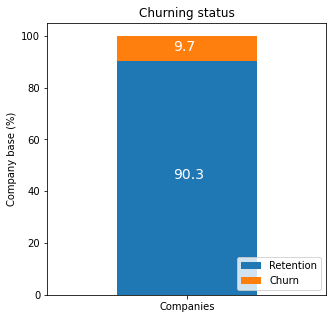

In [11]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

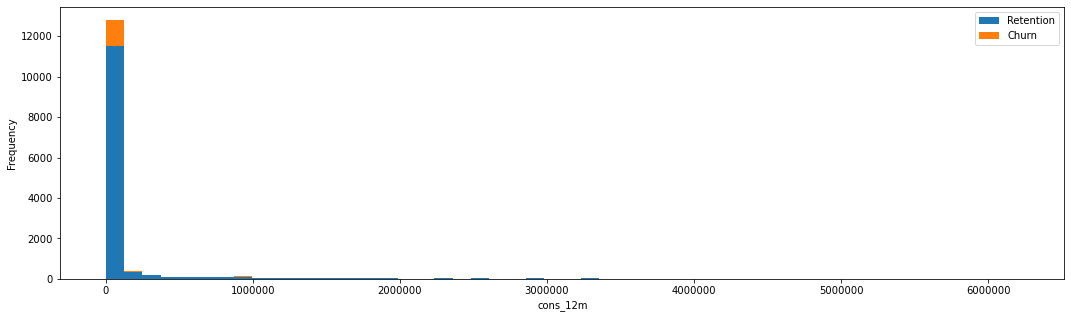

In [12]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

In [13]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [14]:
client_df.corr()['churn'].sort_values()[:-1]

num_years_antig                  -0.074140
cons_12m                         -0.045968
cons_last_month                  -0.045284
cons_gas_12m                     -0.037957
nb_prod_act                      -0.014930
forecast_price_energy_off_peak   -0.010837
forecast_cons_year               -0.002558
imp_cons                         -0.001583
forecast_cons_12m                 0.012949
forecast_price_pow_off_peak       0.014778
forecast_discount_energy          0.017026
forecast_price_energy_peak        0.029315
pow_max                           0.030362
net_margin                        0.041135
forecast_meter_rent_12m           0.044245
margin_gross_pow_ele              0.095725
margin_net_pow_ele                0.095772
Name: churn, dtype: float64

In [15]:
client_df['has_gas']

0        t
1        f
2        f
3        f
4        f
        ..
14601    t
14602    f
14603    f
14604    f
14605    f
Name: has_gas, Length: 14606, dtype: object

In [16]:
client_df['binary_has_gas']=client_df['has_gas'].map({'t':1,'f':0})

In [17]:
from dateutil import parser

In [18]:
client_df[['date_activ','date_end']]

,date_activ,date_end
0,2013-06-15,2016-06-15
1,2009-08-21,2016-08-30
2,2010-04-16,2016-04-16
3,2010-03-30,2016-03-30
4,2010-01-13,2016-03-07
...,...,...
14601,2012-05-24,2016-05-08
14602,2012-08-27,2016-08-27
14603,2012-02-08,2016-02-07
14604,2012-08-30,2016-08-30


In [19]:
def total_days(row):
    start_days=parser.parse(row['date_activ'])
    end_days=parser.parse(row['date_end'])
    total_days=(end_days-start_days).days
    return total_days
client_df['toatl_active_days']=client_df.apply(total_days,axis=1)


In [20]:
client_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,binary_has_gas,toatl_active_days
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,1,1096
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,0,2566
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,0,2192
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,0,2192
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,0,2245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0,1,1445
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1,0,1461
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1,0,1460
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0,0,1461


In [21]:
client_df.corr()['churn'].sort_values()[:-1]

num_years_antig                  -0.074140
toatl_active_days                -0.073919
cons_12m                         -0.045968
cons_last_month                  -0.045284
cons_gas_12m                     -0.037957
binary_has_gas                   -0.024321
nb_prod_act                      -0.014930
forecast_price_energy_off_peak   -0.010837
forecast_cons_year               -0.002558
imp_cons                         -0.001583
forecast_cons_12m                 0.012949
forecast_price_pow_off_peak       0.014778
forecast_discount_energy          0.017026
forecast_price_energy_peak        0.029315
pow_max                           0.030362
net_margin                        0.041135
forecast_meter_rent_12m           0.044245
margin_gross_pow_ele              0.095725
margin_net_pow_ele                0.095772
Name: churn, dtype: float64

In [22]:
client_df['origin_up'].head(12)

0     lxidpiddsbxsbosboudacockeimpuepw
1     kamkkxfxxuwbdslkwifmmcsiusiuosws
2     kamkkxfxxuwbdslkwifmmcsiusiuosws
3     kamkkxfxxuwbdslkwifmmcsiusiuosws
4     kamkkxfxxuwbdslkwifmmcsiusiuosws
5     lxidpiddsbxsbosboudacockeimpuepw
6     lxidpiddsbxsbosboudacockeimpuepw
7     lxidpiddsbxsbosboudacockeimpuepw
8     kamkkxfxxuwbdslkwifmmcsiusiuosws
9     lxidpiddsbxsbosboudacockeimpuepw
10    kamkkxfxxuwbdslkwifmmcsiusiuosws
11    kamkkxfxxuwbdslkwifmmcsiusiuosws
Name: origin_up, dtype: object

In [23]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,binary_has_gas,toatl_active_days
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152,0.181501,2007.537587
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175,0.385446,604.875654
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000,0.000000,731.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000,0.000000,1461.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000,0.000000,1828.500000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000,0.000000,2353.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000,1.000000,4795.000000


In [24]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'binary_has_gas', 'toatl_active_days'],
      dtype='object')

<AxesSubplot:xlabel='churn', ylabel='toatl_active_days'>

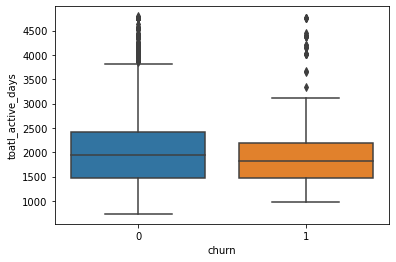

In [25]:
sns.boxplot(y='toatl_active_days',x='churn',data=client_df)

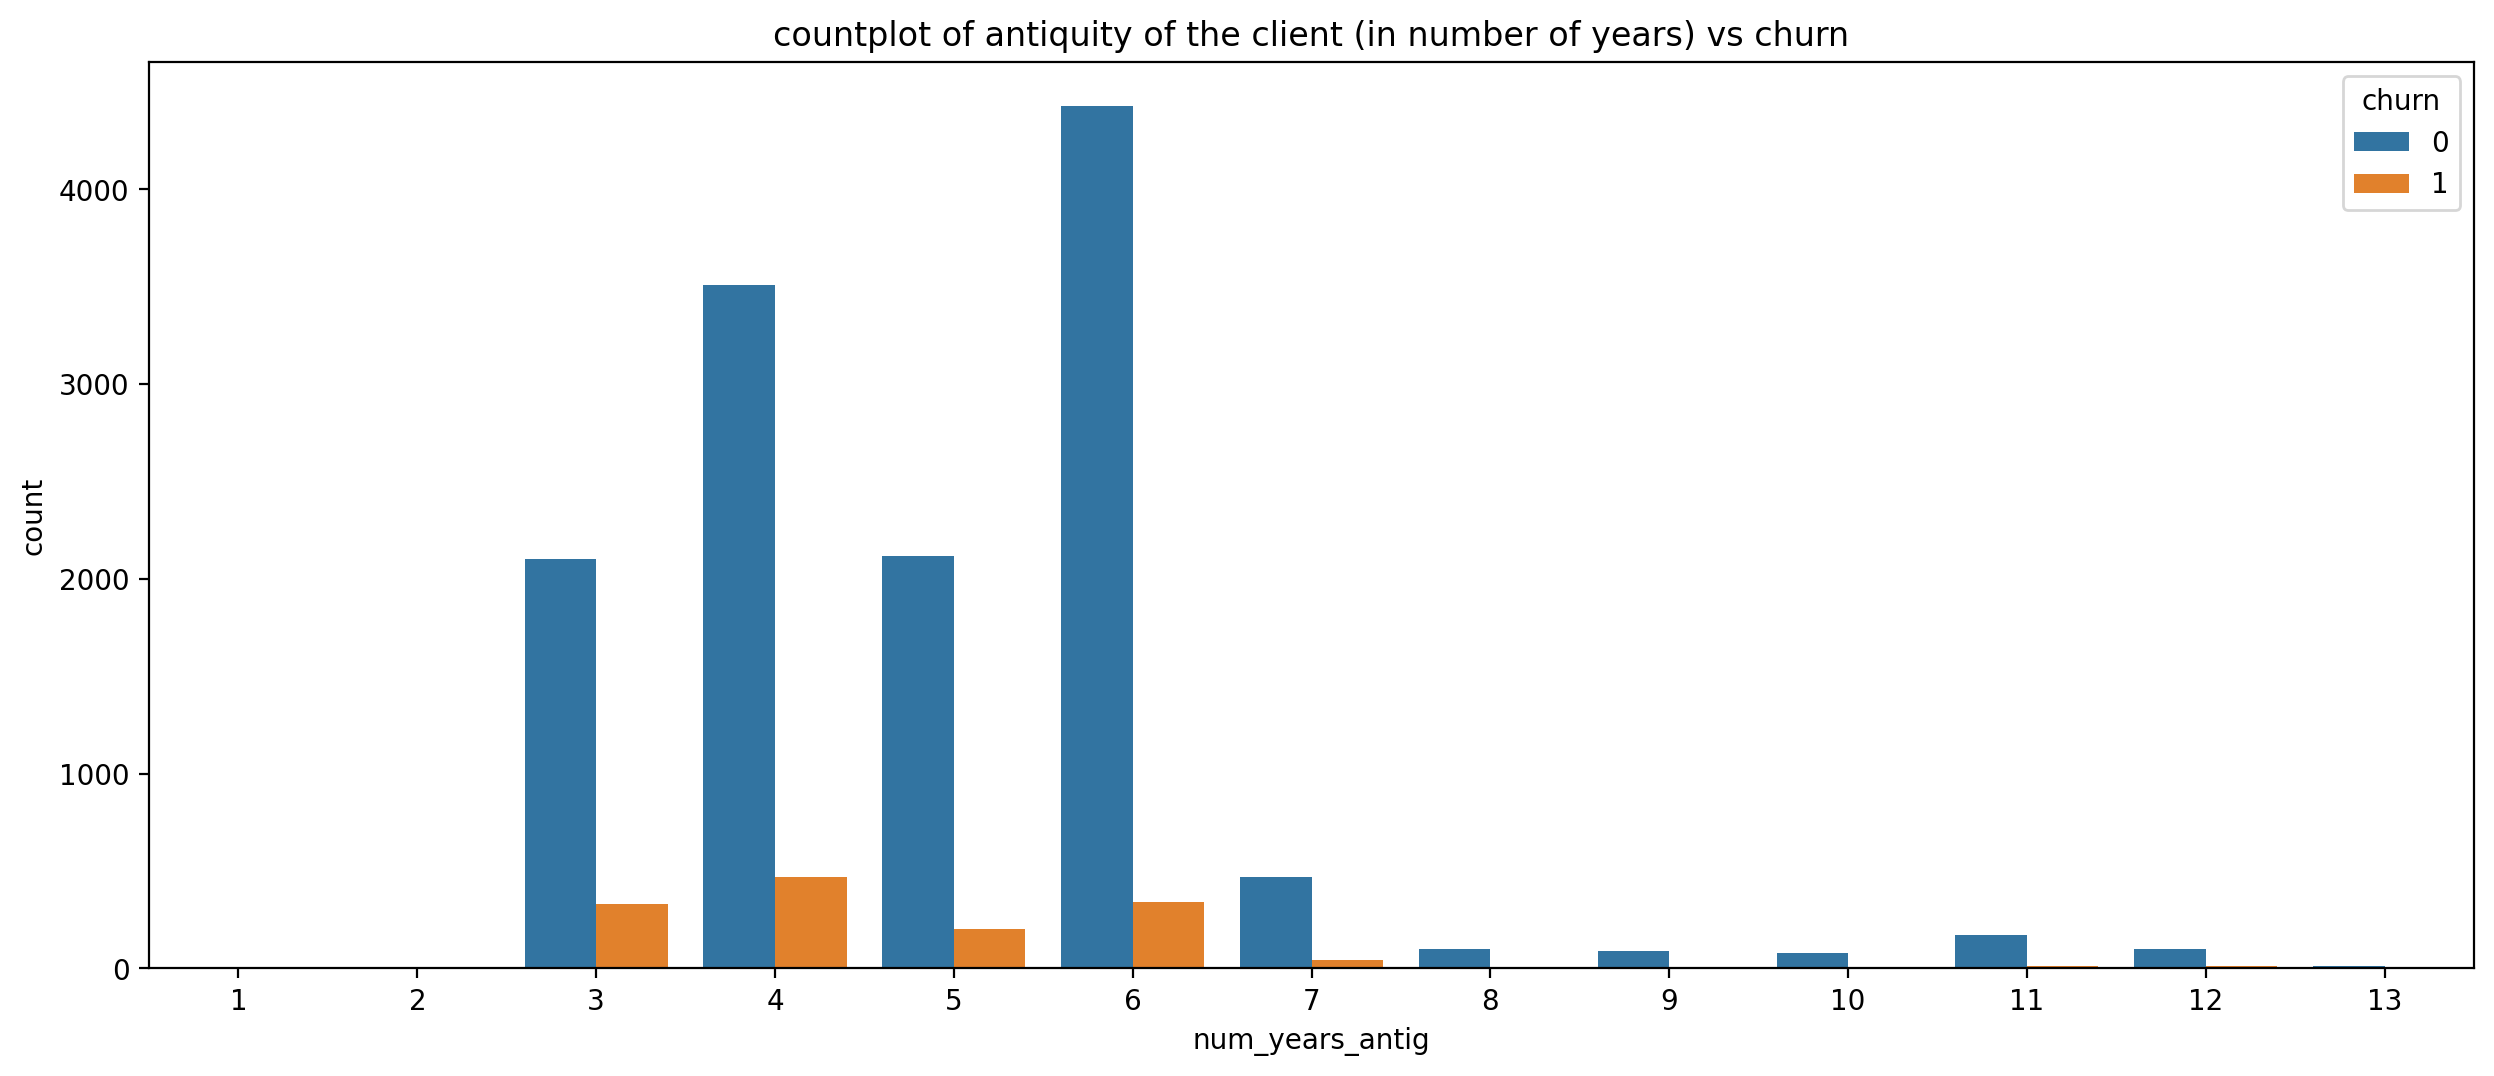

In [26]:
plt.figure(figsize=(15,6),dpi=200)
sns.countplot(x='num_years_antig',data=client_df,hue='churn')
plt.title('countplot of antiquity of the client (in number of years) vs churn')
plt.show()

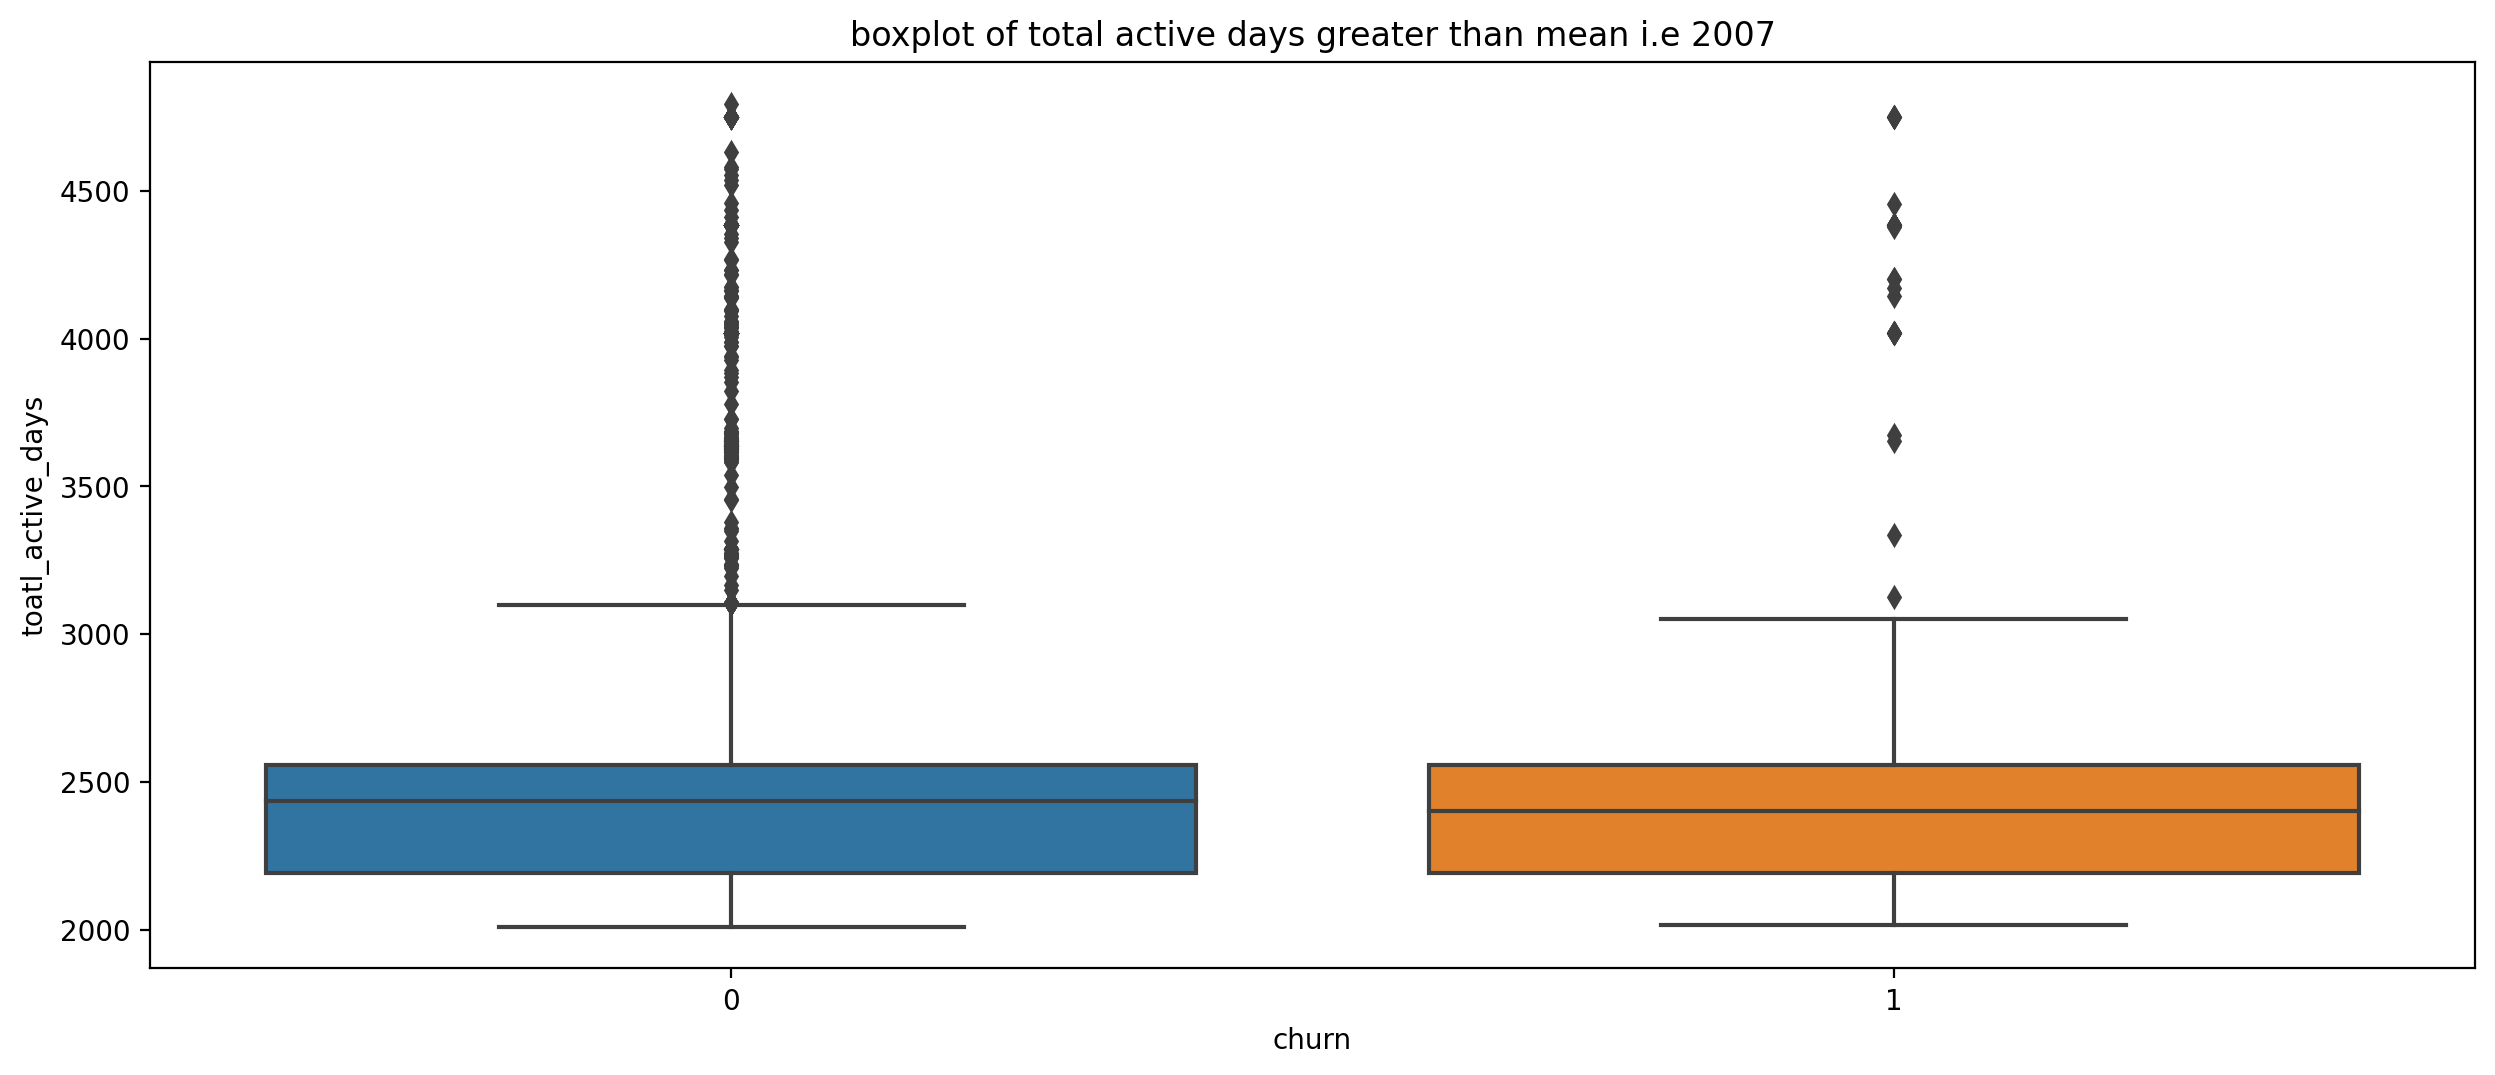

In [27]:
plt.figure(figsize=(15, 6), dpi=200)
sns.boxplot(y=client_df[client_df['toatl_active_days'] >2007]['toatl_active_days'],x='churn',data=client_df)
plt.title('boxplot of total active days greater than mean i.e 2007')
plt.show()

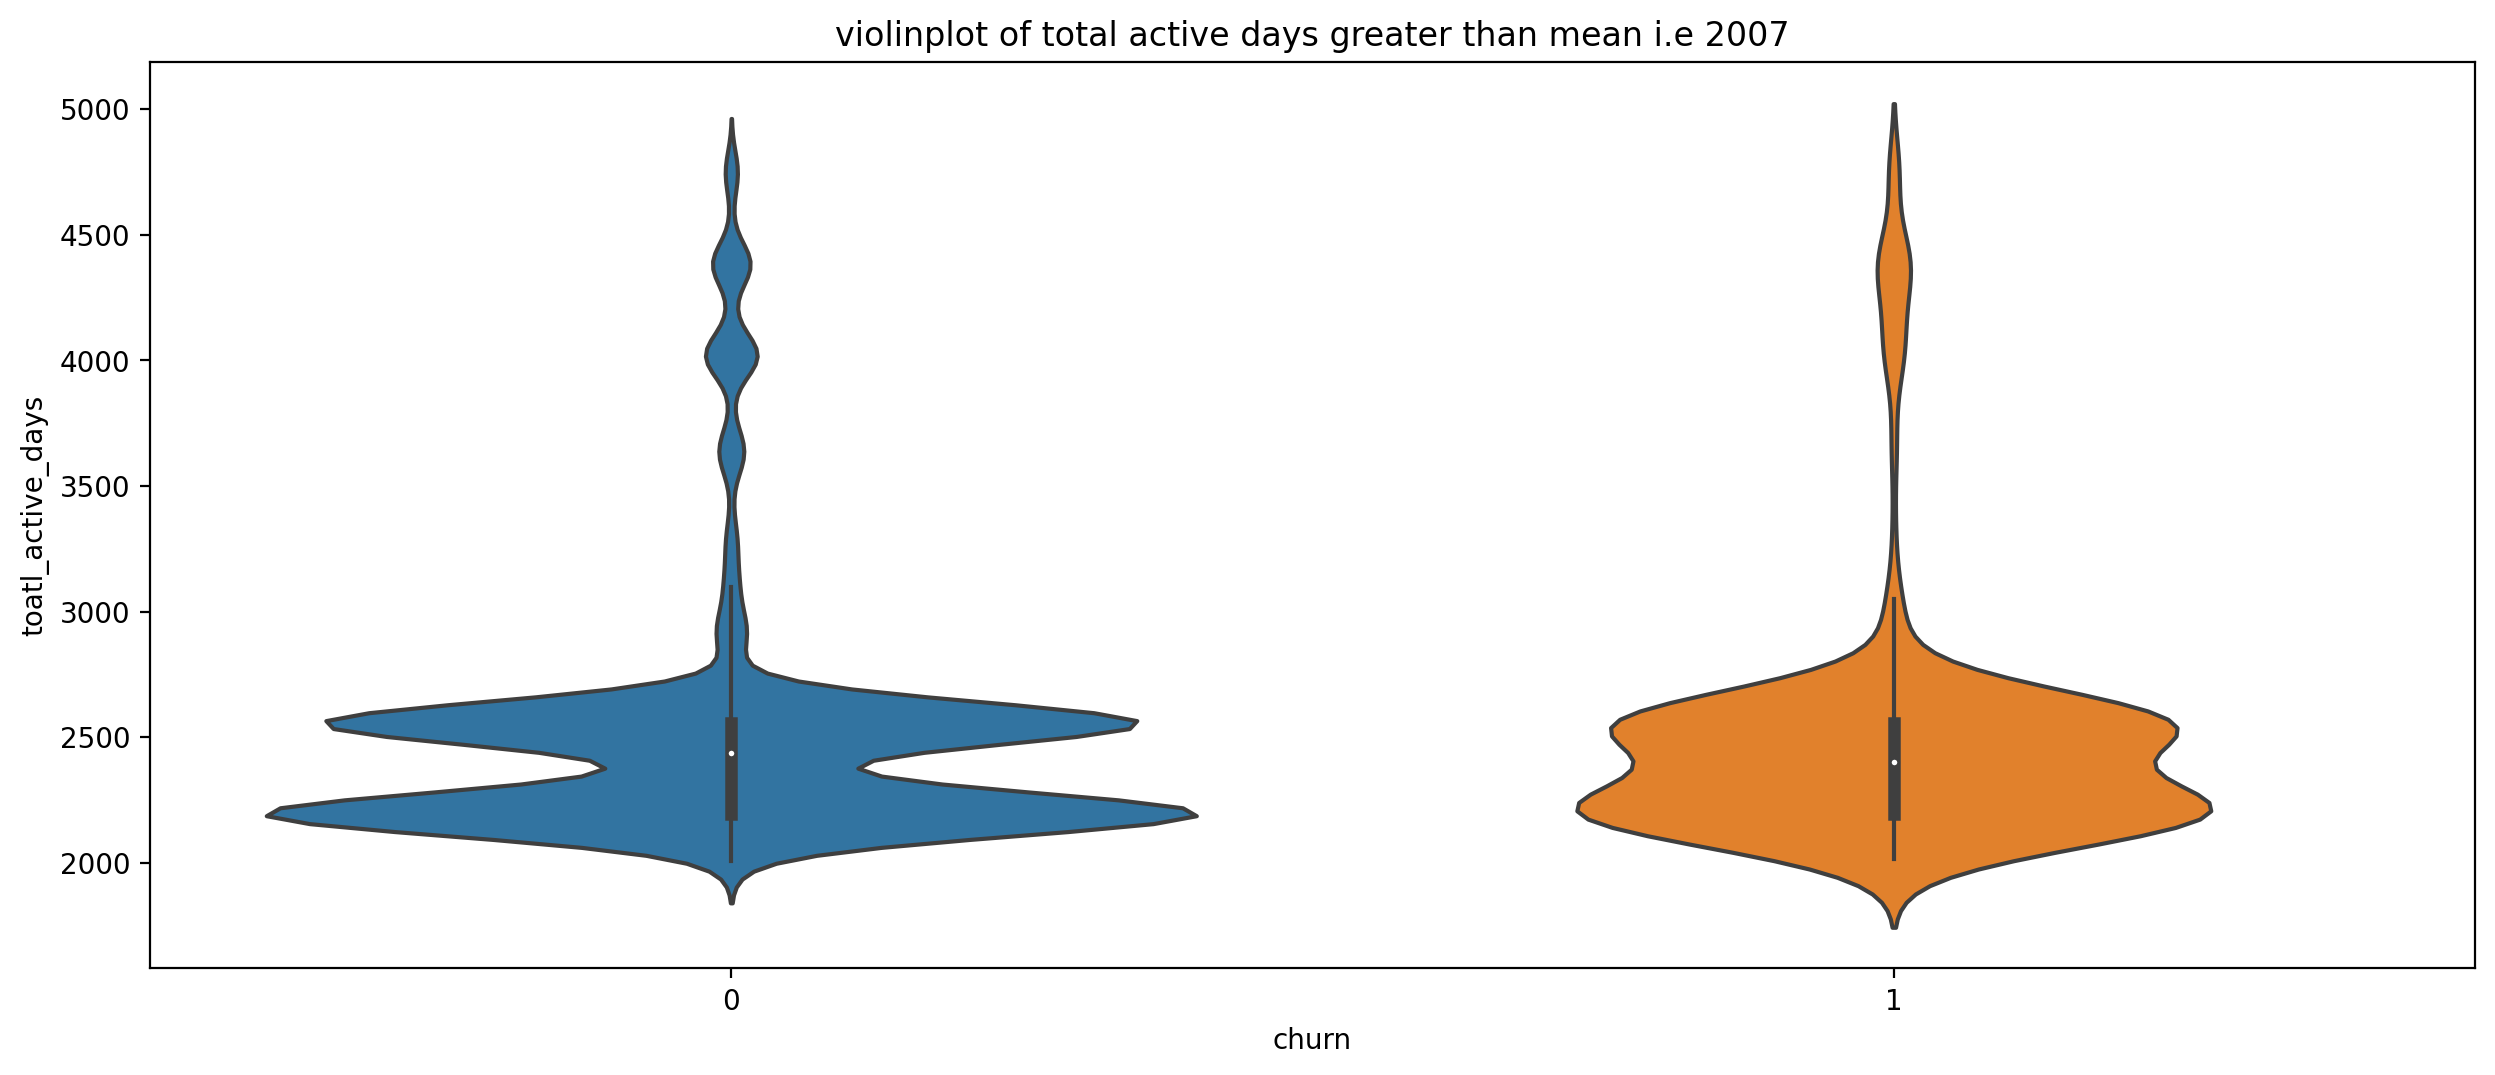

In [28]:
plt.figure(figsize=(15, 6), dpi=200)
sns.violinplot(y=client_df[client_df['toatl_active_days'] >2007]['toatl_active_days'],x='churn',data=client_df)
plt.title('violinplot of total active days greater than mean i.e 2007')
plt.show()

C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cons_12m', ylabel='cons_gas_12m'>

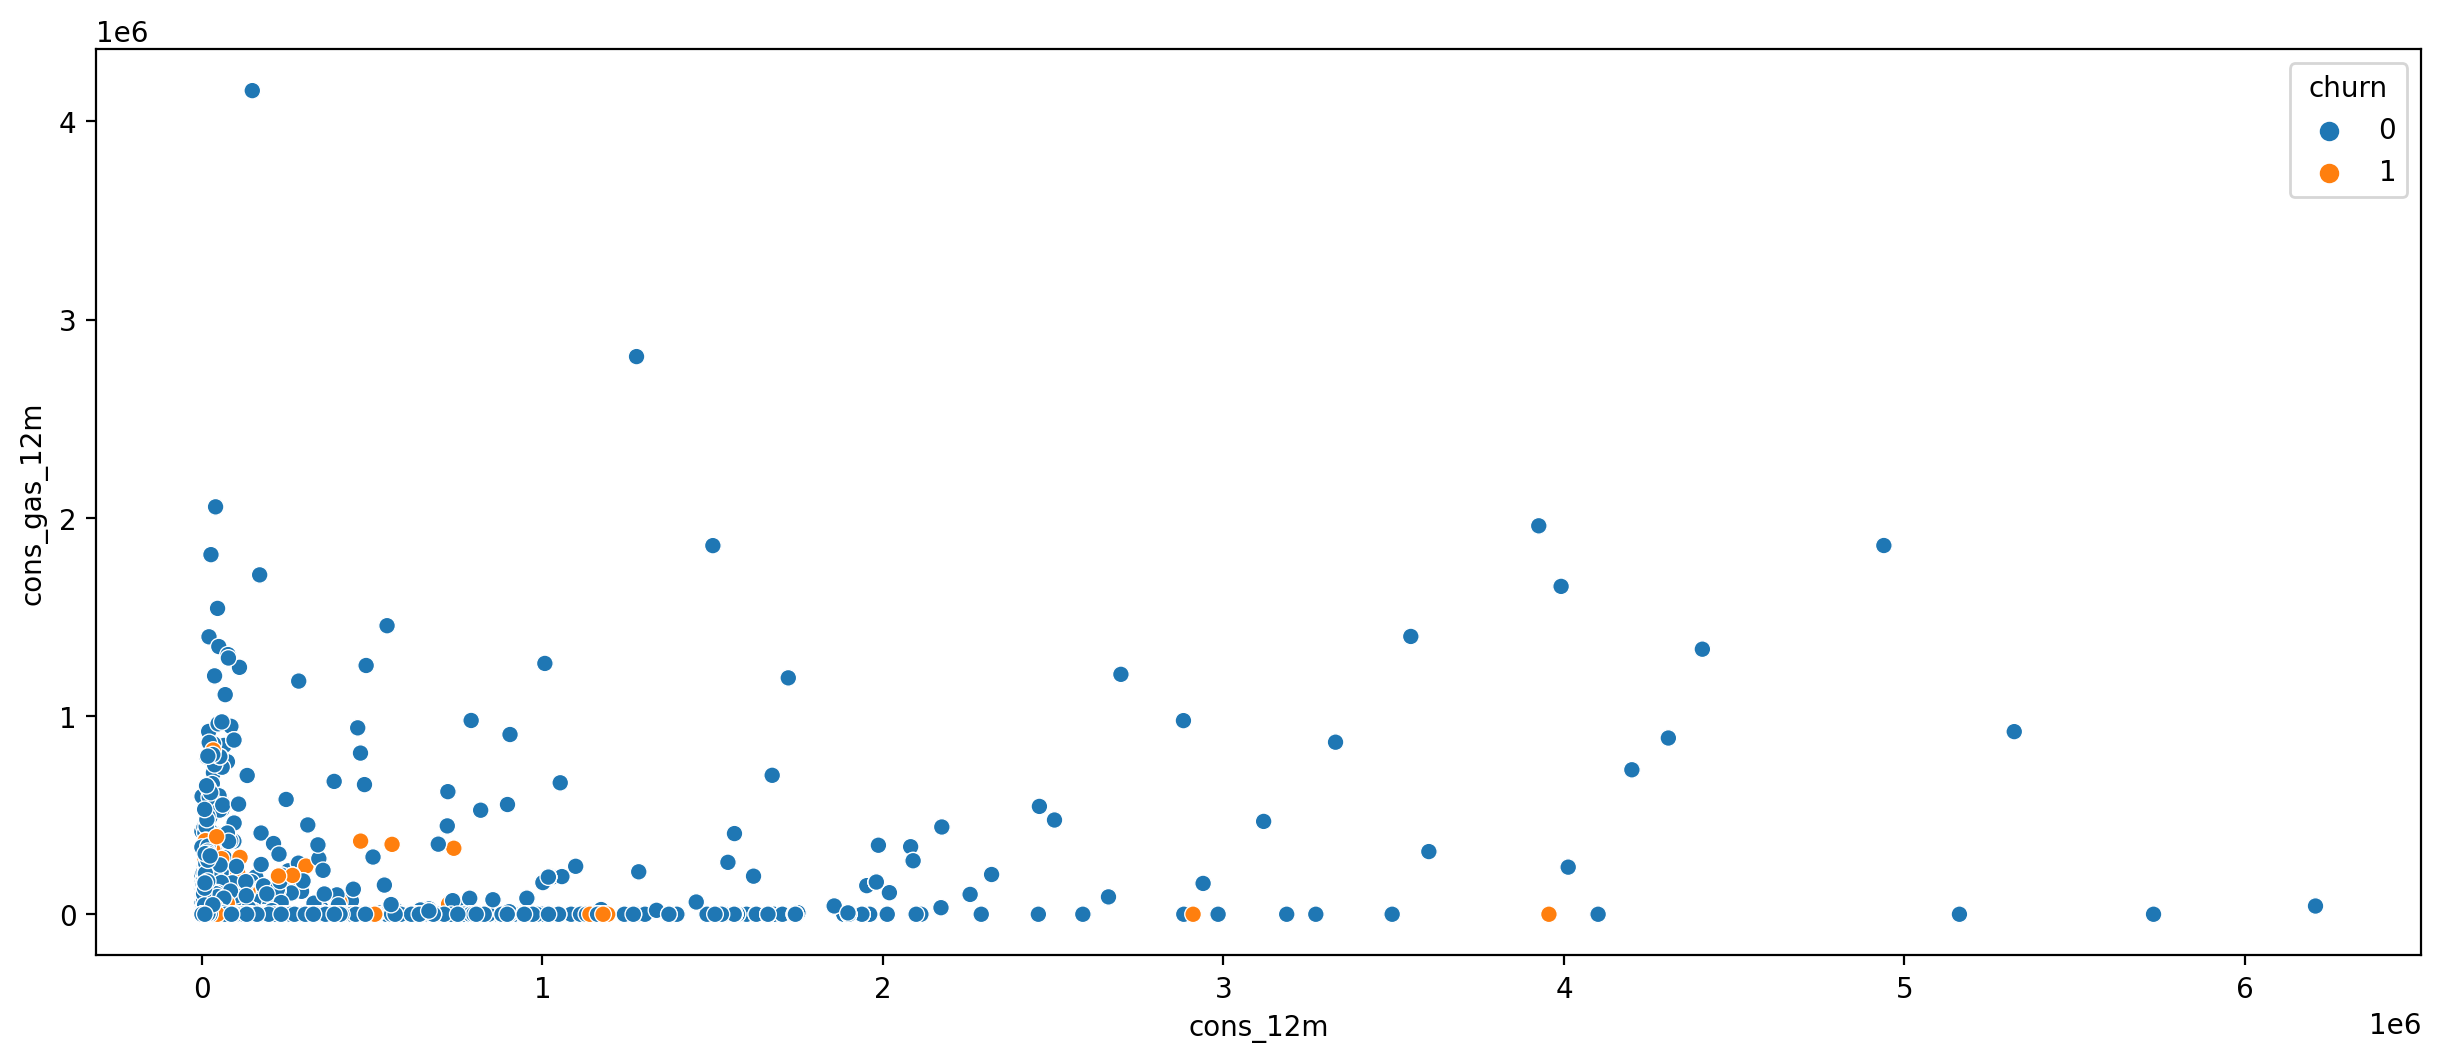

In [29]:
plt.figure(figsize=(15, 6), dpi=200)
sns.scatterplot('cons_12m','cons_gas_12m',data=client_df,hue='churn')

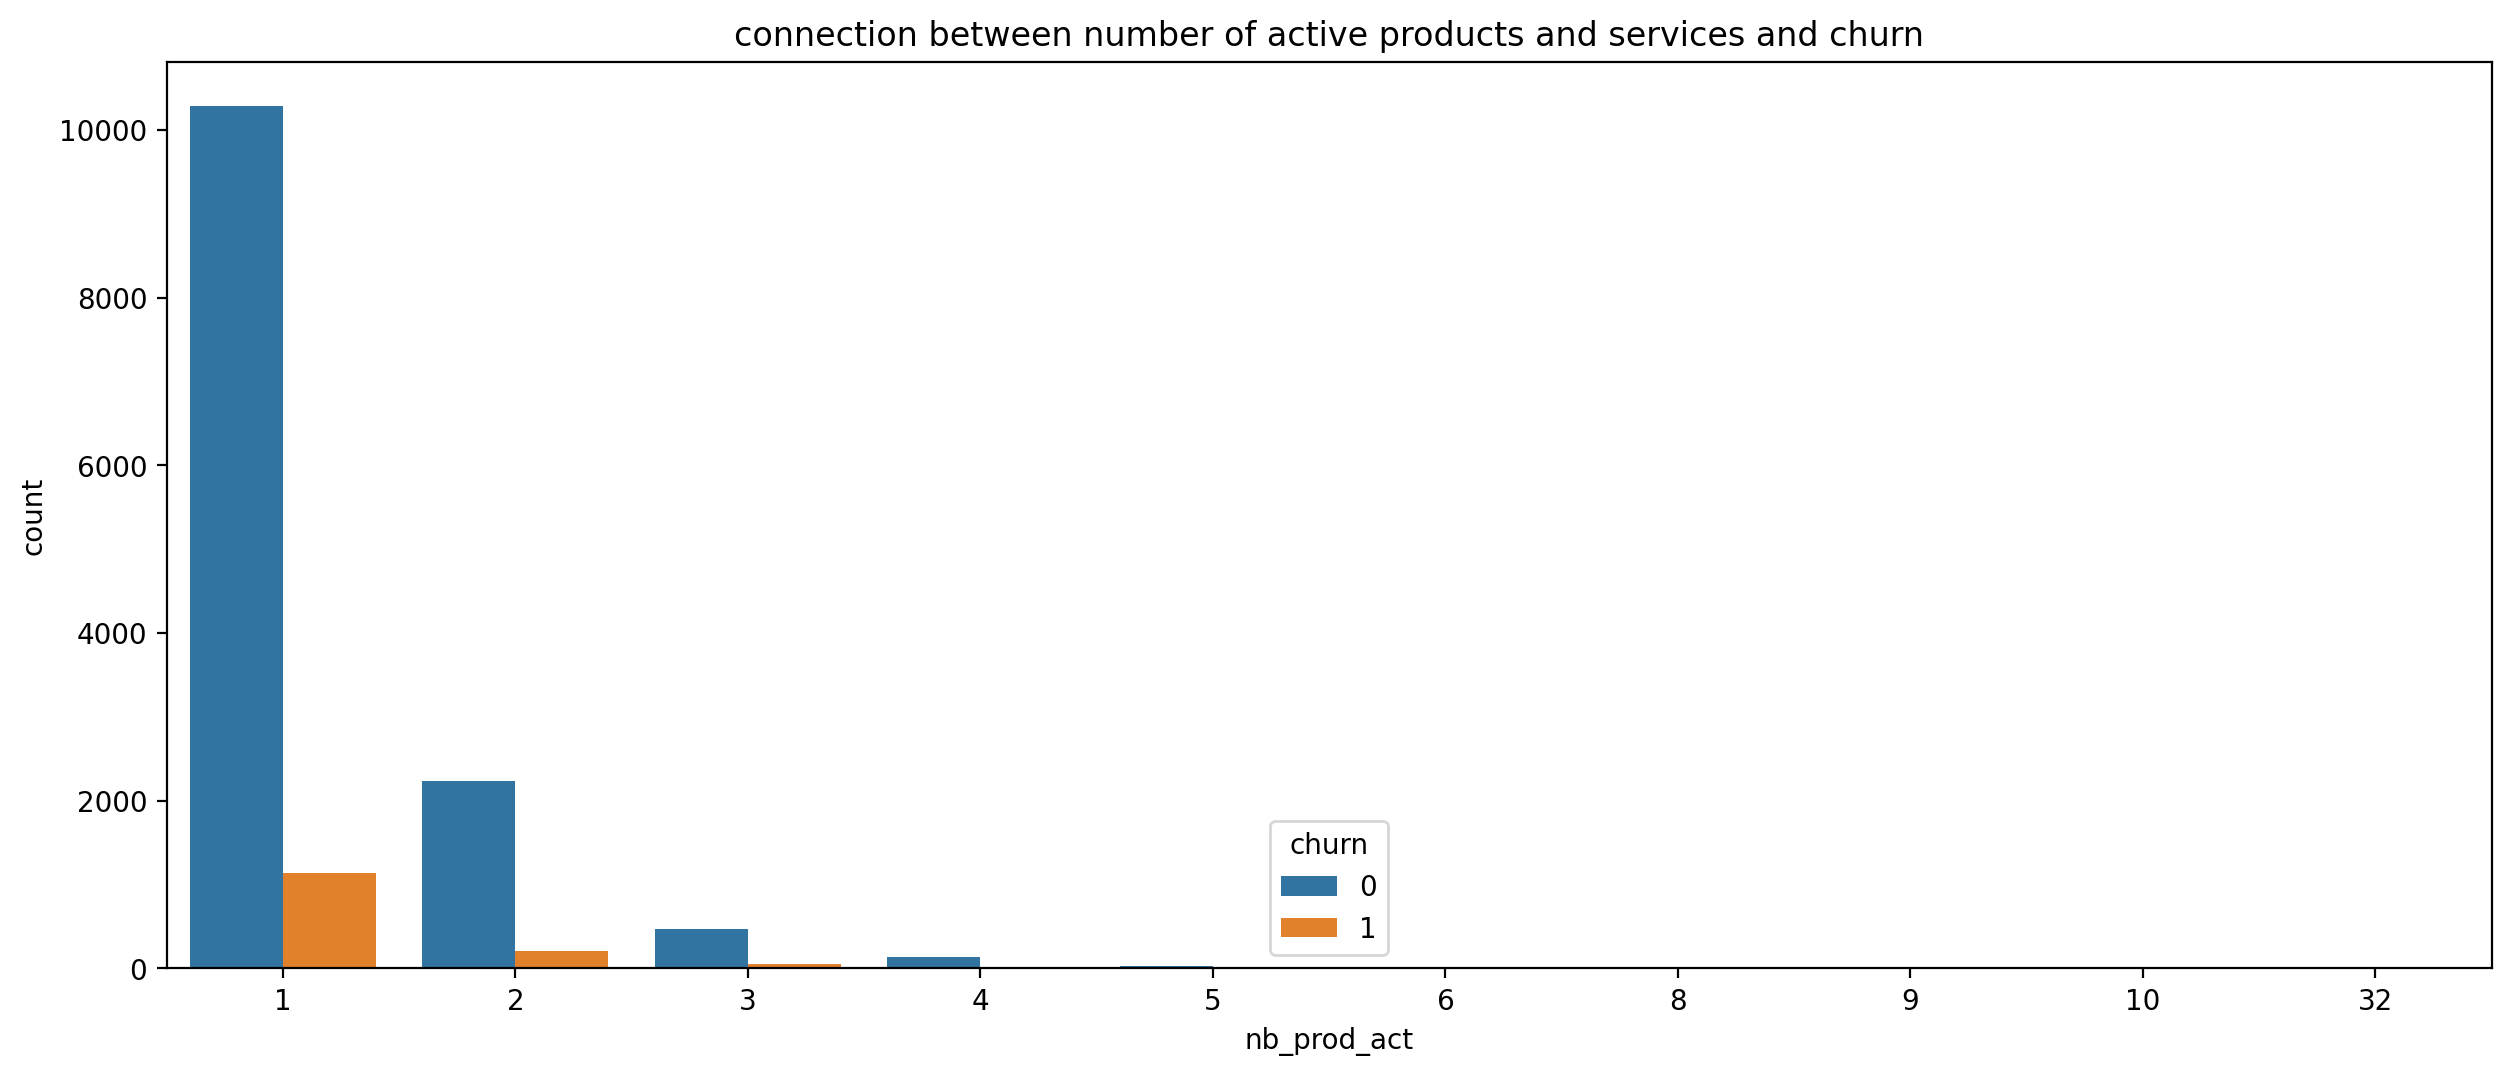

In [30]:
plt.figure(figsize=(15, 6), dpi=200)
sns.countplot(x='nb_prod_act',data=client_df,hue='churn')
plt.title('connection between number of active products and services and churn')
plt.show()

In [31]:
client_df.groupby('churn')['margin_gross_pow_ele'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,13187.0,23.929863,19.359021,0.0,13.86,21.48,29.64,374.64
1,1419.0,30.468682,26.306684,0.0,17.13,26.04,34.68,299.64


In [32]:
client_df.groupby('churn')['toatl_active_days'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,13187.0,2022.204065,605.783266,731.0,1461.0,1933.0,2410.5,4795.0
1,1419.0,1871.239605,579.071742,979.0,1461.0,1827.0,2192.0,4749.0


In [33]:
client_df.groupby('churn')['forecast_discount_energy'].describe()

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,13187.0,0.938197,5.037164,0.0,0.0,0.0,0.0,30.0
1,1419.0,1.231853,5.722344,0.0,0.0,0.0,0.0,30.0


In [34]:
client_df[client_df['forecast_discount_energy']>20][['forecast_discount_energy','churn']]

,forecast_discount_energy,churn
31,30.0,0
57,24.0,0
88,28.0,0
106,30.0,0
129,30.0,0
...,...,...
14483,28.0,1
14526,30.0,0
14531,23.0,0
14533,24.0,0


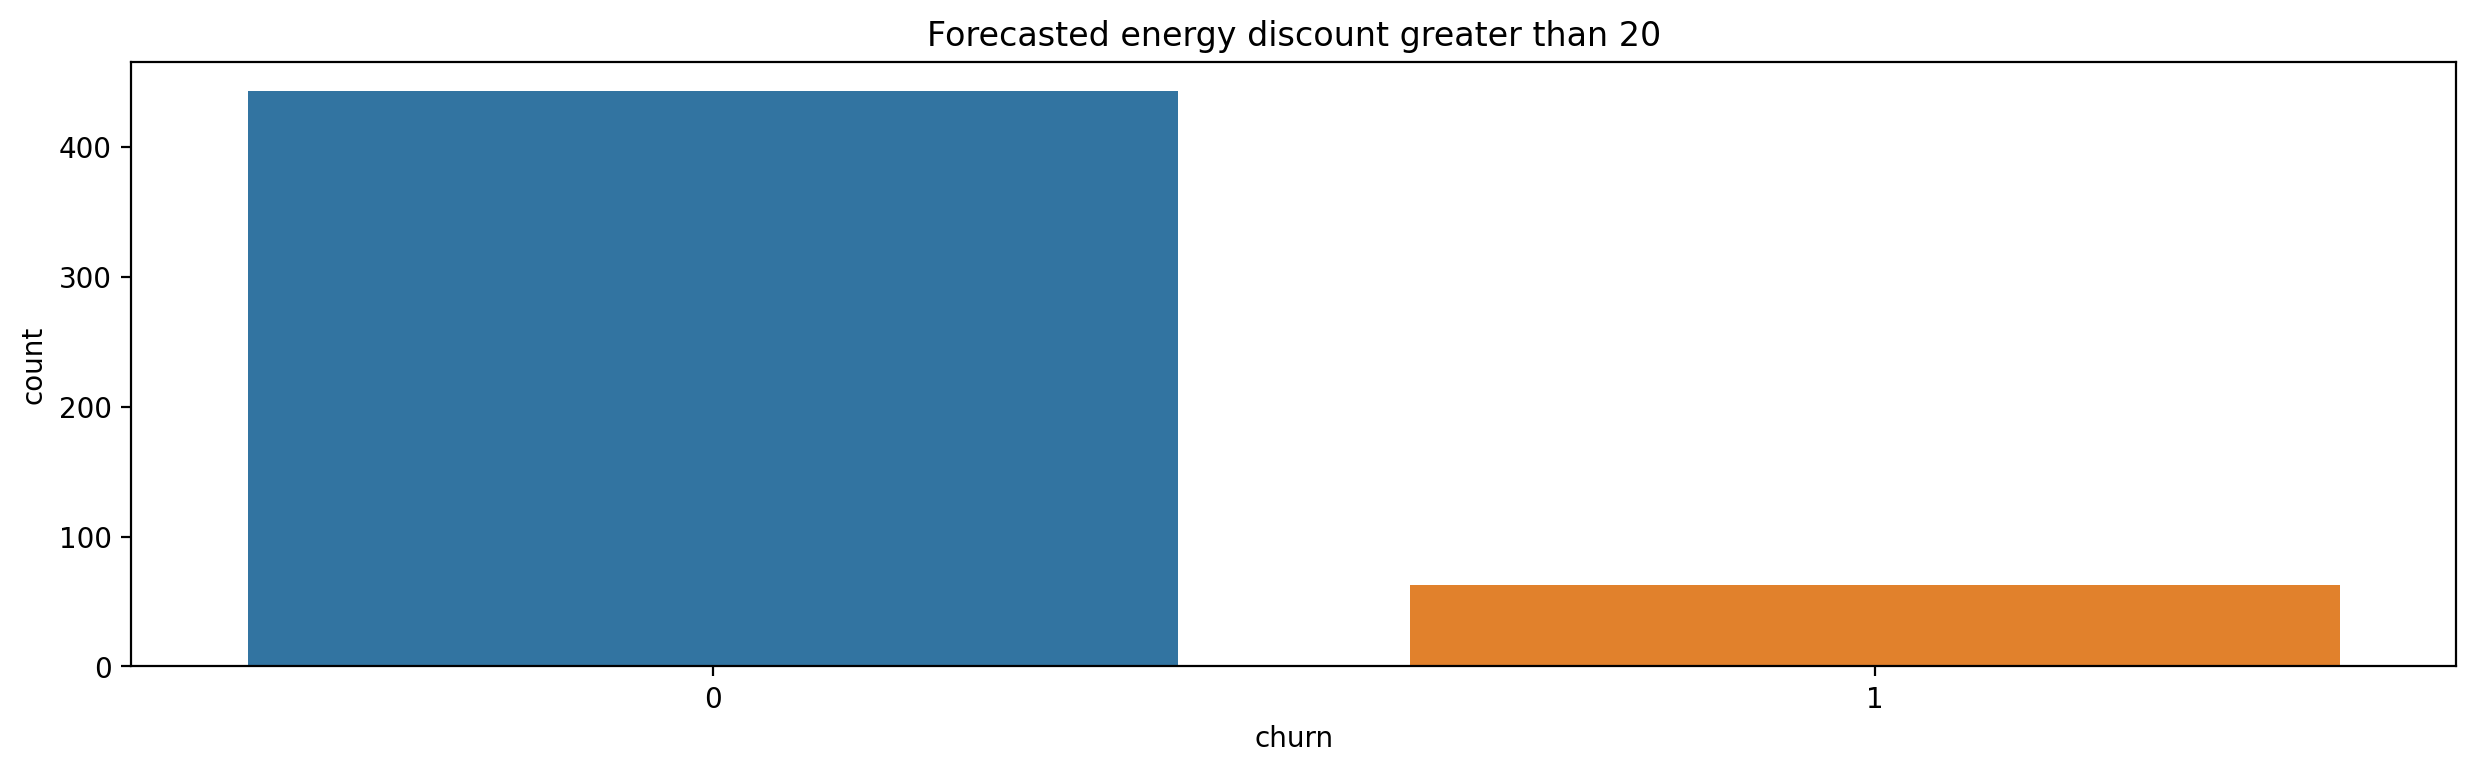

In [35]:
plt.figure(figsize=(15, 4),dpi=200)
filtered_data=client_df[client_df['forecast_discount_energy']>20]
sns.countplot(x='churn',data=filtered_data)
plt.title('Forecasted energy discount greater than 20')
plt.show()

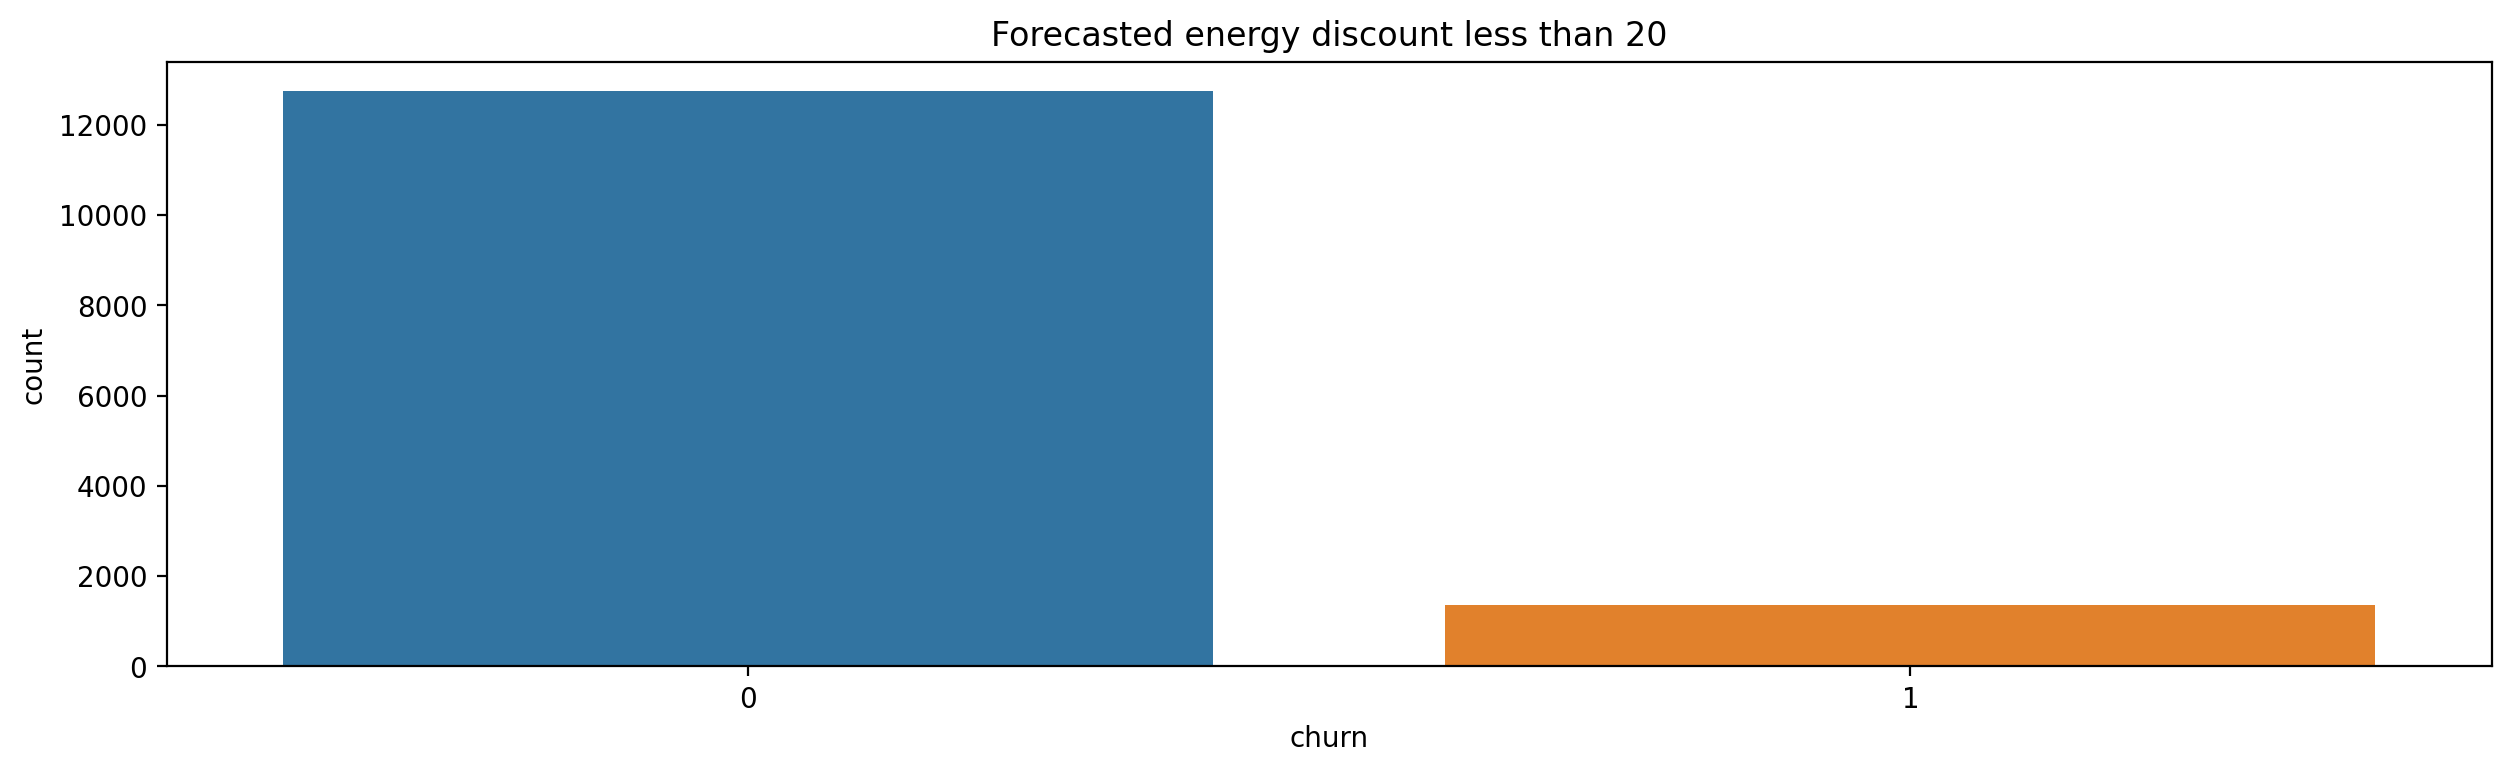

In [36]:
plt.figure(figsize=(15, 4),dpi=200)
filtered_data=client_df[client_df['forecast_discount_energy']<=20]
sns.countplot(x='churn',data=filtered_data)
plt.title('Forecasted energy discount less than 20')
plt.show()

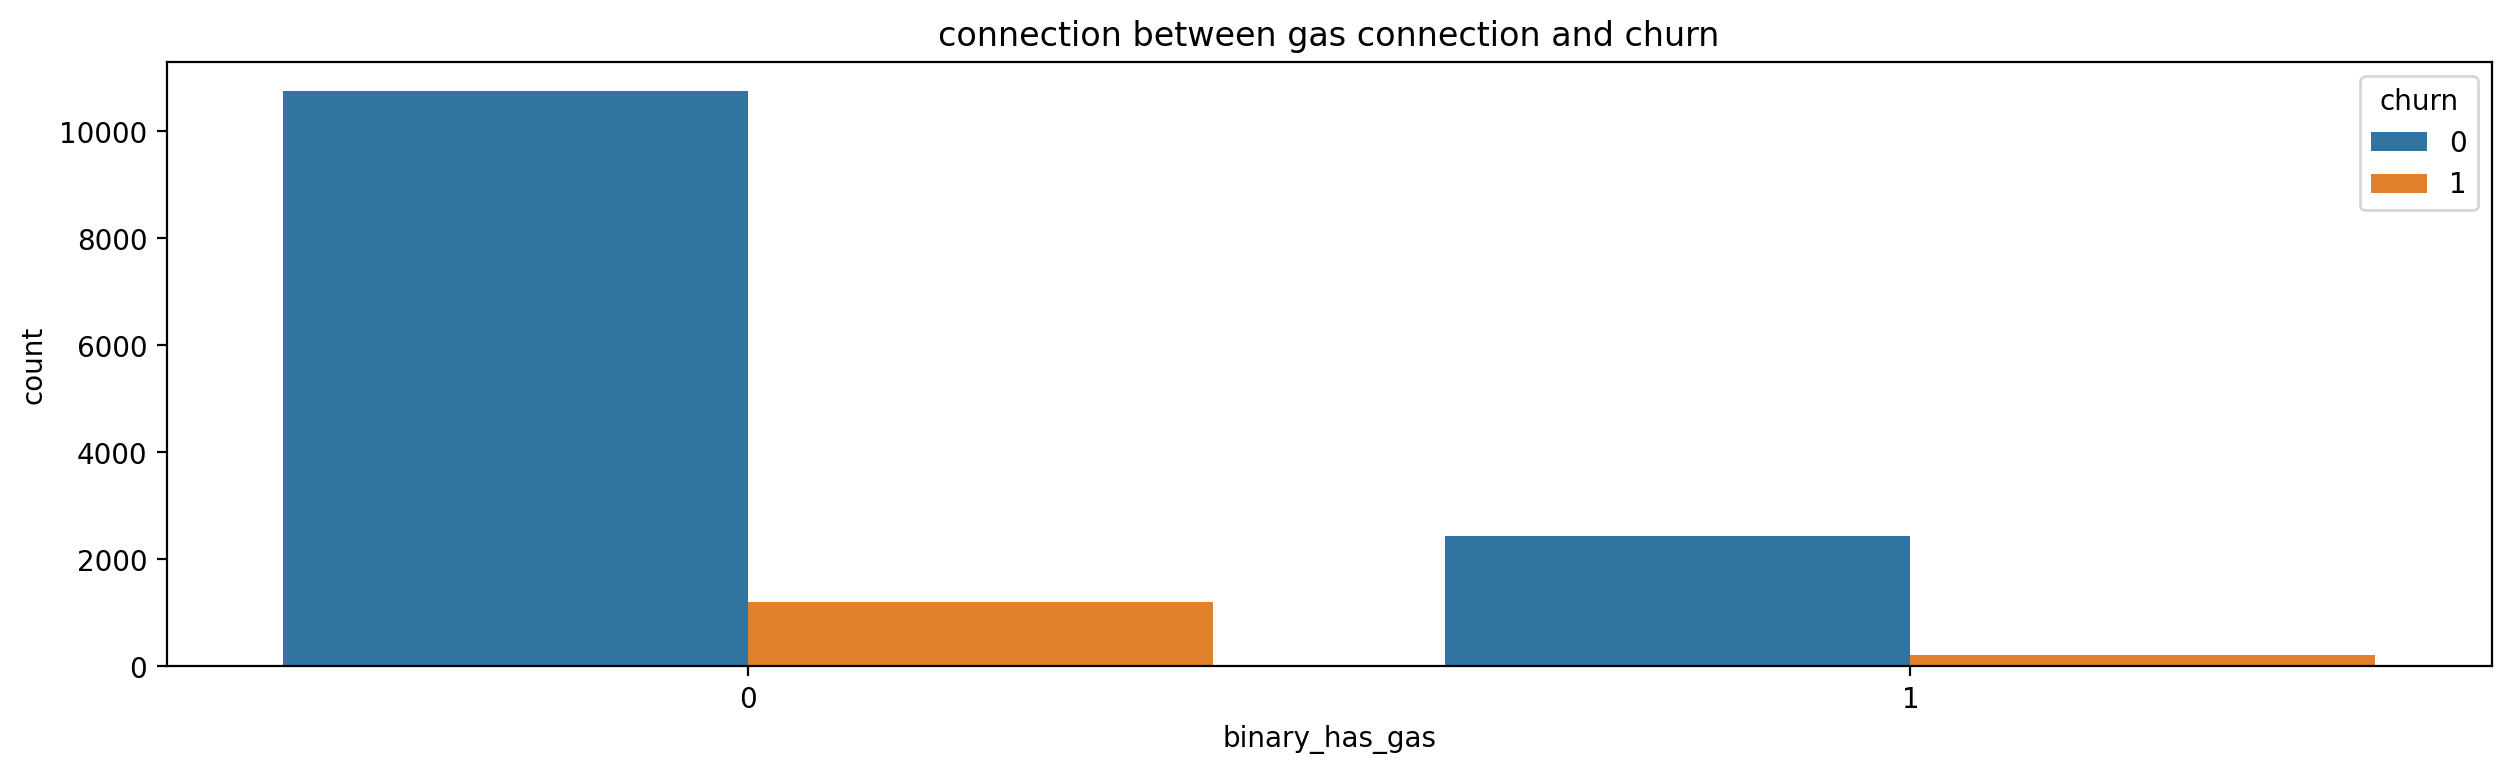

In [37]:
plt.figure(figsize=(15, 4), dpi=200)
sns.countplot(x='binary_has_gas',data=client_df,hue='churn')
plt.title('connection between gas connection and churn')
plt.show()

In [38]:
client_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,binary_has_gas,toatl_active_days
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,1,1096
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,0,2566
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,0,2192
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,0,2192
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,0,2245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0,1,1445
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1,0,1461
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1,0,1460
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0,0,1461


In [39]:
client_df['origin_up'].unique()

array(['lxidpiddsbxsbosboudacockeimpuepw',
       'kamkkxfxxuwbdslkwifmmcsiusiuosws',
       'ldkssxwpmemidmecebumciepifcamkci', 'MISSING',
       'usapbepcfoloekilkwsdiboslwaxobdp',
       'ewxeelcelemmiwuafmddpobolfuxioce'], dtype=object)

In [40]:
client_df['channel_sales'].unique()

array(['foosdfpfkusacimwkcsosbicdxkicaua', 'MISSING',
       'lmkebamcaaclubfxadlmueccxoimlema',
       'usilxuppasemubllopkaafesmlibmsdf',
       'ewpakwlliwisiwduibdlfmalxowmwpci',
       'epumfxlbckeskwekxbiuasklxalciiuu',
       'sddiedcslfslkckwlfkdpoeeailfpeds',
       'fixdbufsefwooaasfcxdxadsiekoceaa'], dtype=object)

In [41]:
client_df[client_df['origin_up']=='MISSING']

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,binary_has_gas,toatl_active_days
17,4e4a34a6d91ff25d0fdf68733907ad44,foosdfpfkusacimwkcsosbicdxkicaua,30776,0,0,2011-08-01,2016-07-25,2014-07-25,2015-07-27,3045.16,...,19.29,19.29,1,335.78,5,MISSING,25.000,0,0,1820
158,01fbea88102b46f036ff17ebe4d23459,lmkebamcaaclubfxadlmueccxoimlema,15040,4383,0,2010-05-07,2016-04-16,2015-04-15,2015-04-17,1625.53,...,30.18,30.18,2,204.98,6,MISSING,25.000,0,1,2171
357,9c4bde81b5b4913b46c28986b39be5ae,MISSING,30513,0,2294,2008-02-11,2016-02-11,2014-05-05,2015-02-12,3081.42,...,49.44,49.44,1,321.18,8,MISSING,33.000,0,0,2922
499,f1d5af5e1fff4c8acaac81dce31028d0,MISSING,17855,315,0,2012-04-02,2016-06-01,2015-06-01,2015-04-04,658.67,...,37.74,37.74,3,240.86,4,MISSING,12.000,0,1,1521
1094,66ba1d7066c1d430cc17974387c10b25,ewpakwlliwisiwduibdlfmalxowmwpci,2501,0,0,2012-12-06,2016-12-06,2015-11-01,2015-12-07,287.81,...,27.28,27.28,1,21.84,3,MISSING,13.856,0,0,1461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12762,c854b26113307311c6dd2319ed1f613d,foosdfpfkusacimwkcsosbicdxkicaua,1141,0,9,2012-08-30,2016-05-08,2015-11-25,2015-05-13,98.14,...,31.41,31.41,1,31.93,3,MISSING,17.321,0,0,1347
13244,08194f6221bfc93f6b174f4f3194db42,MISSING,4,0,0,2010-10-21,2016-10-21,2010-10-21,2015-10-23,0.60,...,28.76,28.76,1,0.04,5,MISSING,13.856,0,0,2192
13314,4dbafe448d59092e174999b04b97b20f,MISSING,17493,0,1901,2010-11-05,2017-01-11,2016-01-11,2015-11-05,1590.92,...,0.00,0.00,1,204.66,5,MISSING,10.000,0,0,2259
14228,adff89602e947091aa5adc5e39f2b146,lmkebamcaaclubfxadlmueccxoimlema,25551,0,1891,2011-09-16,2016-09-15,2011-09-16,2015-09-16,20.80,...,72.15,72.15,1,0.11,4,MISSING,35.000,0,0,1826


In [42]:
client_df[client_df['channel_sales']=='MISSING']

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,binary_has_gas,toatl_active_days
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,0,2566
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,0,2245
14,c5037389dd8be351d3c40f2973da2391,MISSING,9707,0,0,2010-12-01,2016-12-01,2010-12-01,2015-12-02,1028.52,...,15.78,15.78,1,111.59,5,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,0,2192
16,bd14bbac3aca710ee5288fcd8511d4bb,MISSING,786536,80583,85883,2010-02-15,2016-02-15,2010-02-15,2015-02-16,13517.50,...,25.68,25.68,2,1087.76,6,lxidpiddsbxsbosboudacockeimpuepw,11.400,0,1,2191
18,f2b93783adecf0d0d8d60ab547bda3de,MISSING,24838,0,2877,2011-05-27,2016-05-27,2011-05-27,2015-05-31,1088.35,...,21.57,21.57,1,117.44,5,ldkssxwpmemidmecebumciepifcamkci,15.001,0,0,1827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14585,cf8fdee748705aacc79b92eca825218f,MISSING,1185,0,0,2009-06-08,2016-06-08,2009-06-08,2015-06-12,176.56,...,21.52,21.52,1,16.13,7,ldkssxwpmemidmecebumciepifcamkci,13.200,0,0,2557
14594,9c93ea61edcaddf27333bc25178e760f,MISSING,6694,0,0,2011-12-01,2016-12-01,2015-11-01,2015-12-02,1007.35,...,15.78,15.78,1,86.54,4,ldkssxwpmemidmecebumciepifcamkci,13.856,0,0,1827
14595,a6096551a64c47cd240c356b0669f892,MISSING,11563,0,0,2010-02-08,2016-02-08,2015-12-16,2015-02-09,1384.83,...,31.20,31.20,1,122.35,6,ldkssxwpmemidmecebumciepifcamkci,13.856,0,0,2191
14598,1582ef35fbfa265e60bb3399bdebac87,MISSING,9441,0,480,2009-10-08,2016-10-08,2015-05-24,2015-10-09,983.97,...,20.00,20.00,1,113.17,6,ldkssxwpmemidmecebumciepifcamkci,15.001,0,0,2557


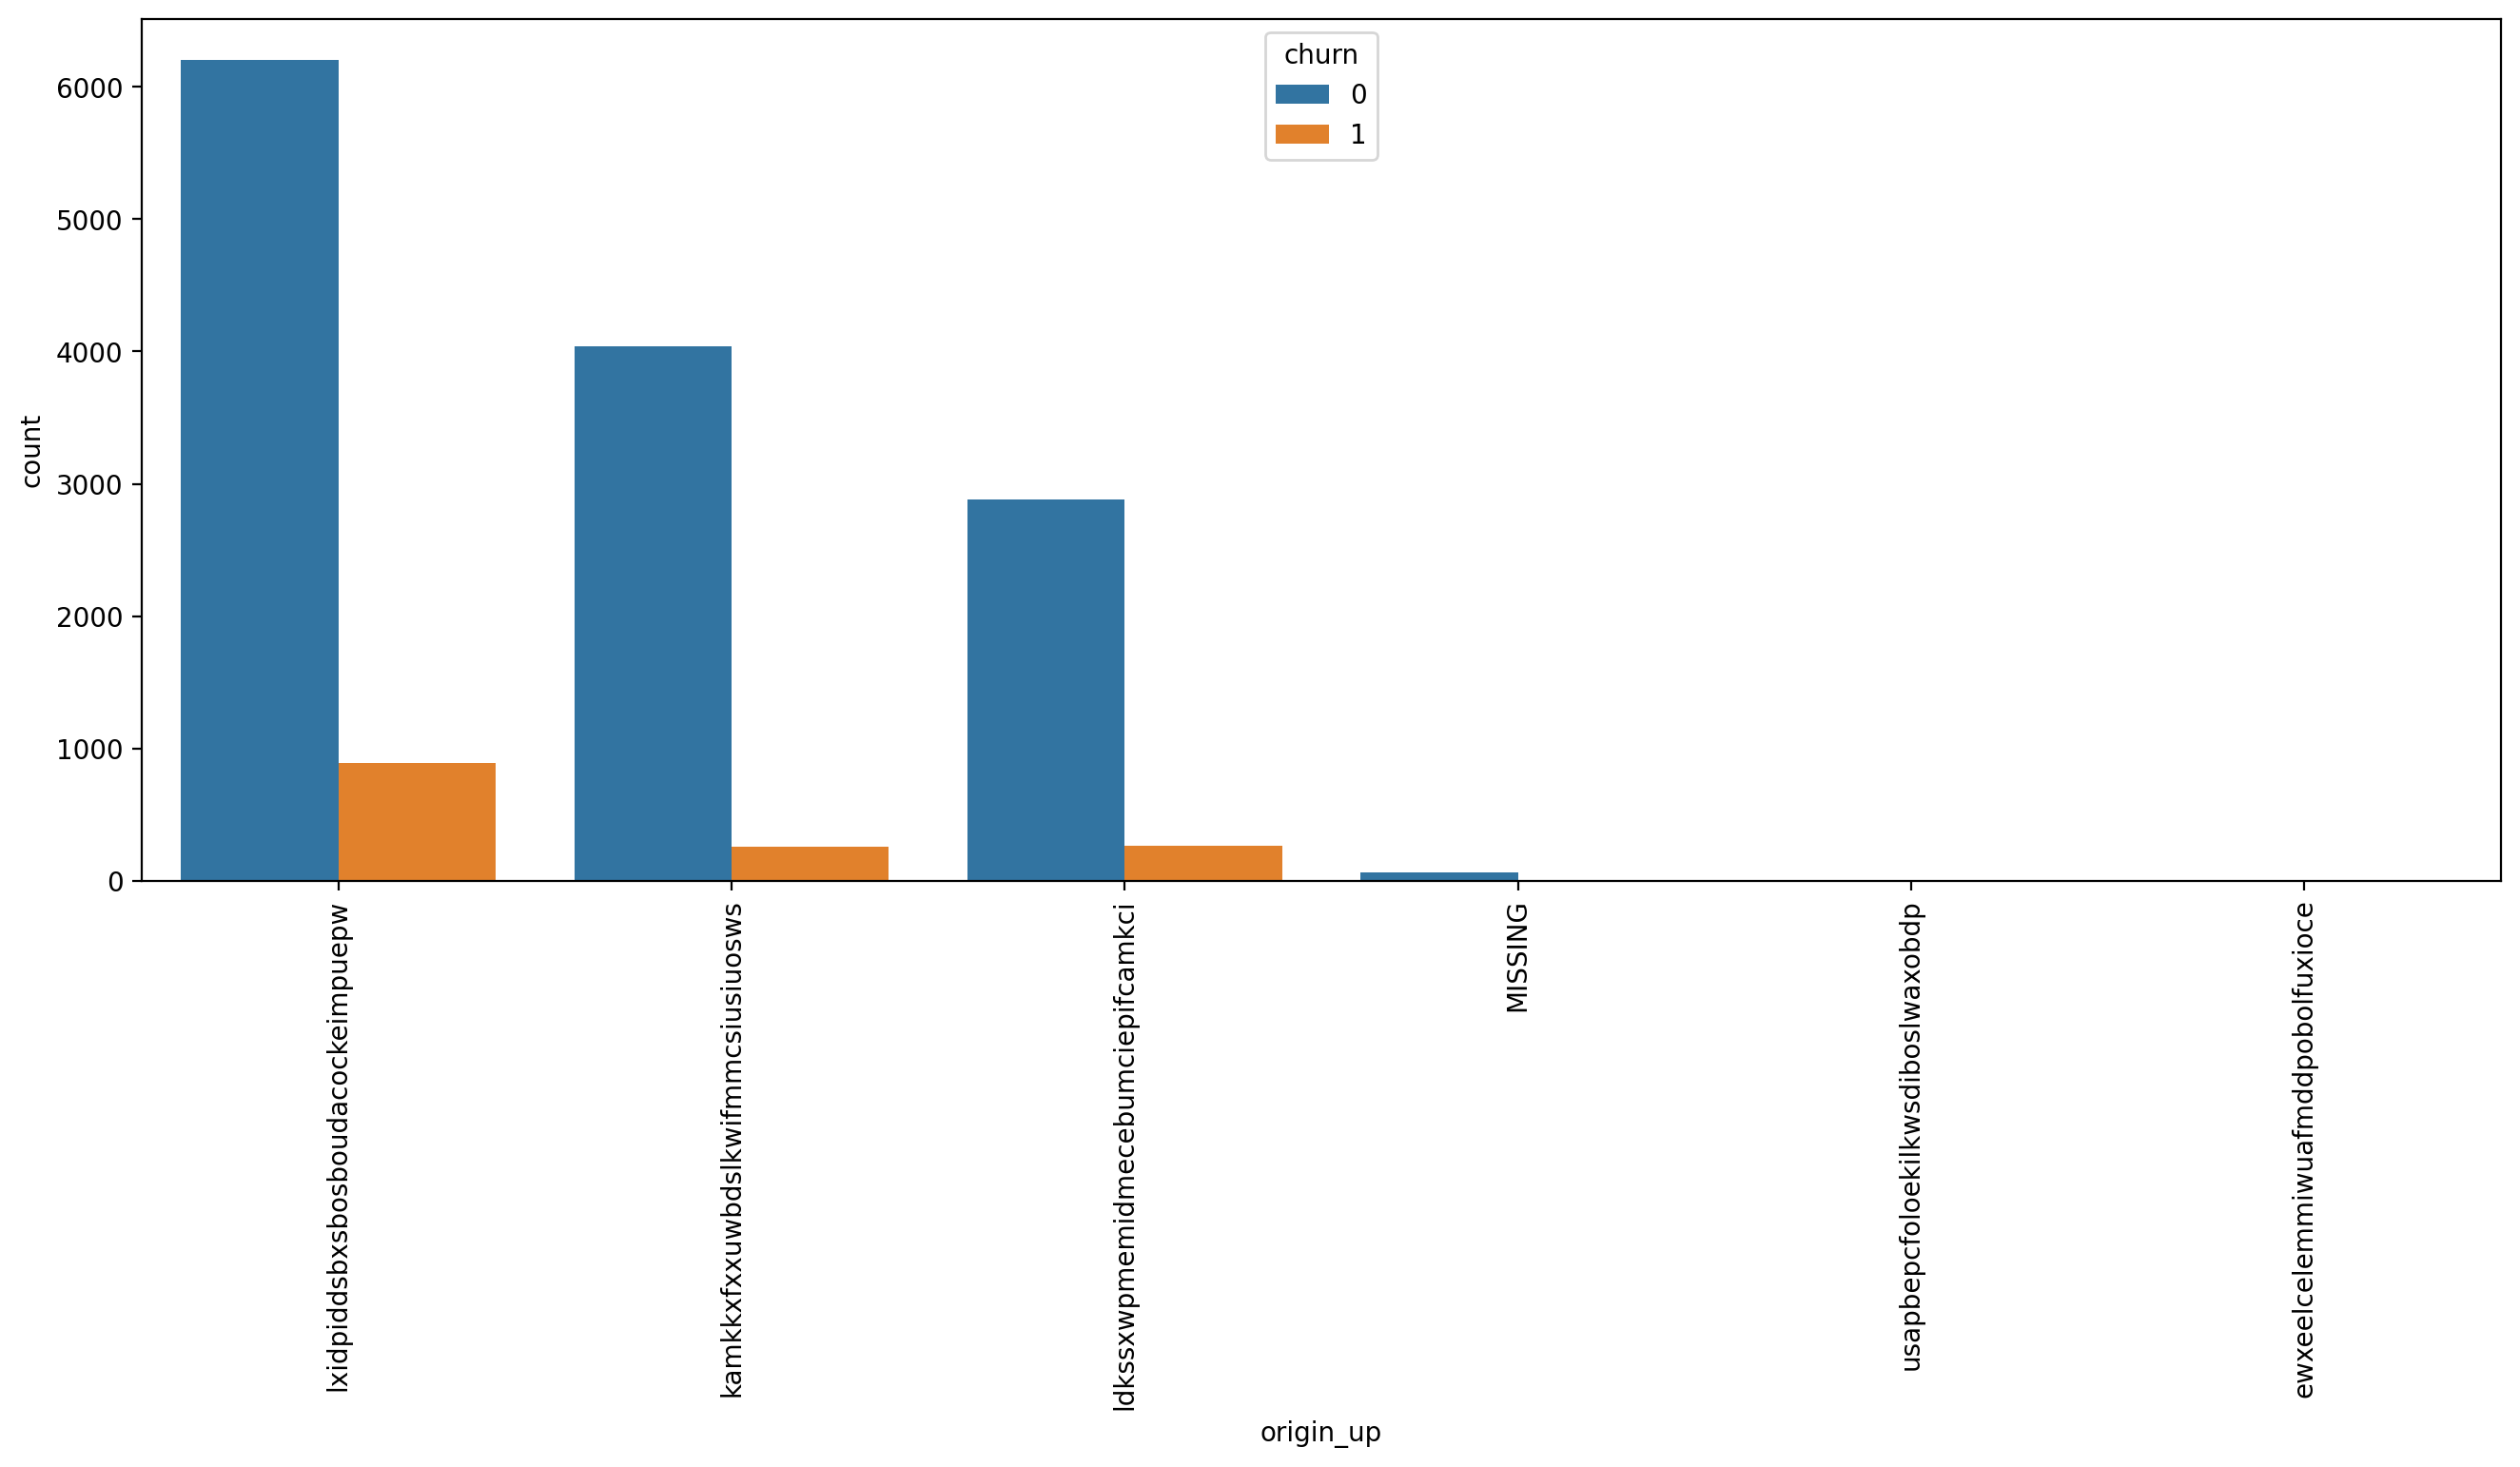

In [43]:
plt.figure(figsize=(16,6),dpi=200)
sns.countplot(x='origin_up',data=client_df,hue='churn')
plt.xticks(rotation=90)
plt.show()

In [44]:
client_df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

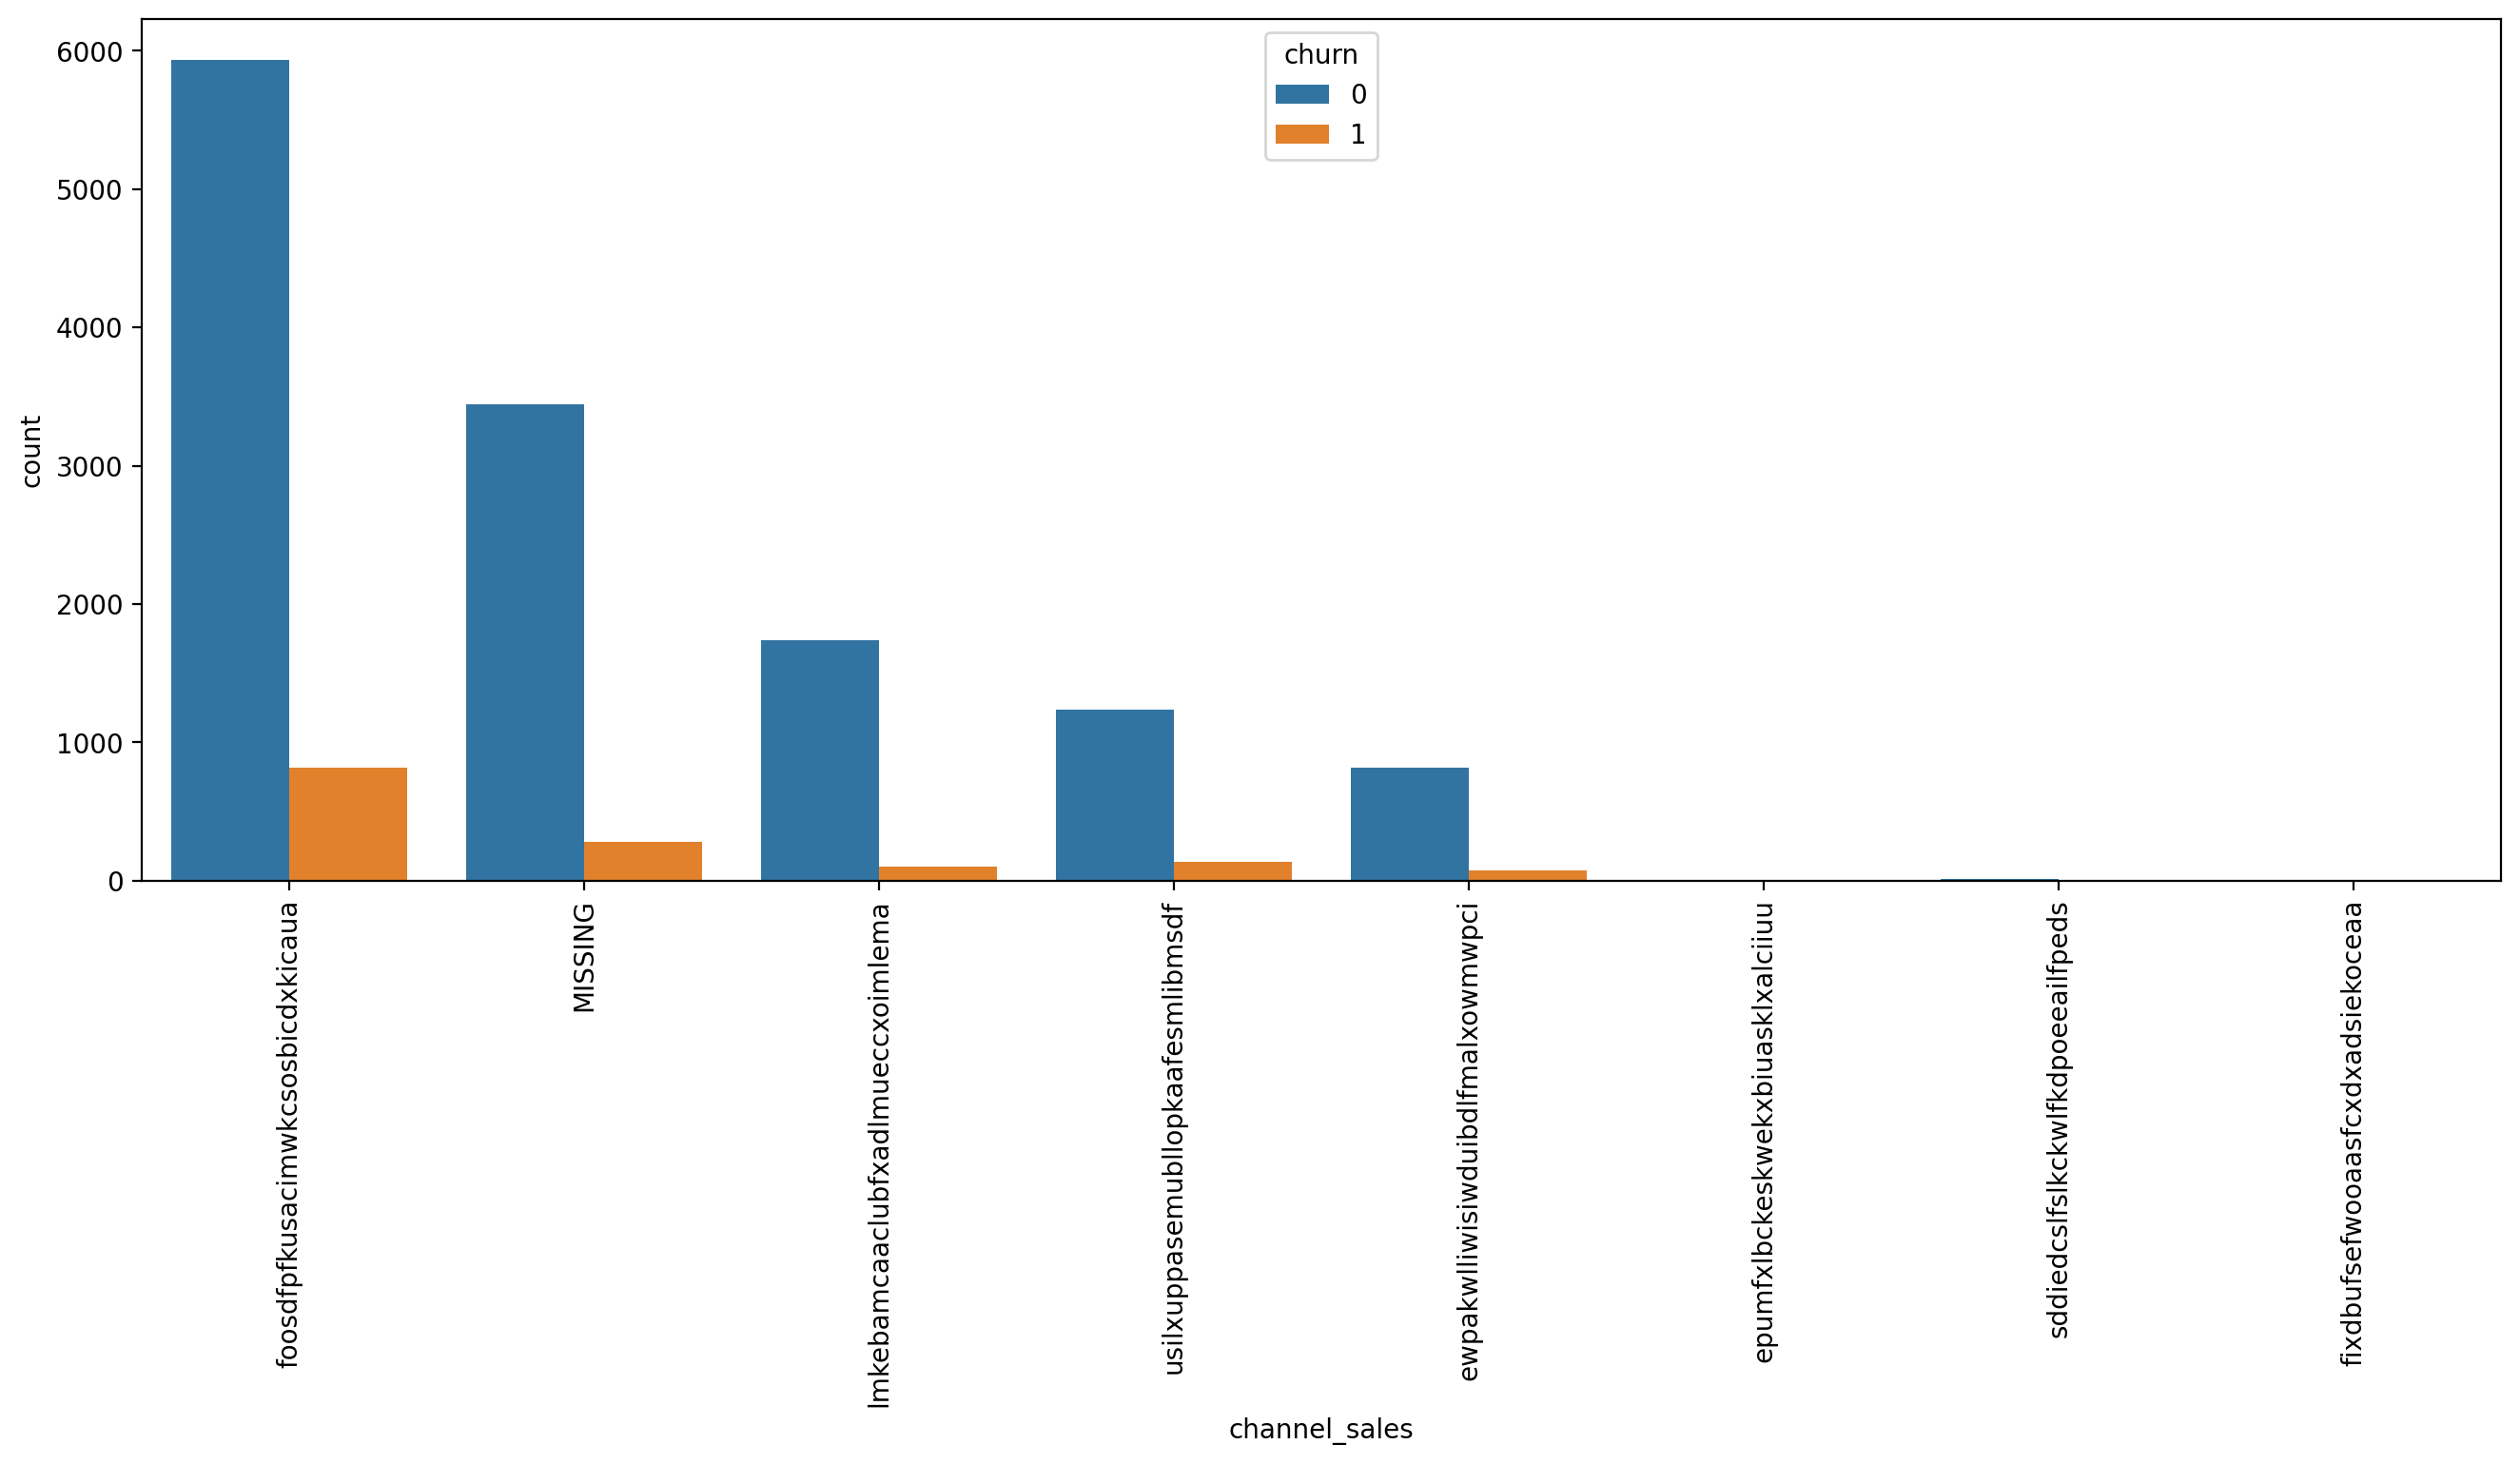

In [45]:
plt.figure(figsize=(16,6),dpi=200)
sns.countplot(x='channel_sales',data=client_df,hue='churn')
plt.xticks(rotation=90)
plt.show()

In [46]:
client_df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [47]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [48]:
df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.000009,2.225451e-06,1.802667e-08,0.014939,0.005682,0.000299,0.014948,5.684001e-03,2.987132e-04,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0


In [49]:
df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'var_year_price_off_peak_var', 'var_year_price_peak_var',
       'var_year_price_mid_peak_var', 'var_year_price_off_peak_fix',
       'var_year_price_peak_fix', 'var_year_price_mid_peak_fix',
       'var_year_price_off_peak', 'var_year_price_peak',
       'var_year_price_mid_peak', 'var_6m_price_off_peak_var',
       'var_6m_price_peak_var', 'var_6m_price_mid_peak_var',
       'var_6m_price_off_peak_fix', 'var_6m_price_peak_fix',
       'var_6m_price_mid_peak_fix', 'var_6m_p

In [50]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,...,14606.000000,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,1.460600e+04,1.460600e+04,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,...,0.000025,3.304264e-05,1.406015e-05,0.922810,1.460247,0.634413,0.922835,1.460280e+00,6.344275e-01,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,...,0.000204,2.231791e-04,1.273170e-04,18.218286,13.760009,5.895346,18.218452,1.376010e+01,5.895470e+00,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000011,9.450150e-08,0.000000e+00,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,...,0.000011,2.896760e-06,4.860000e-10,0.007962,0.000000,0.000000,0.007973,2.896760e-06,4.860000e-10,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,...,0.005543,4.791197e-03,2.415288e-03,525.988881,399.471115,80.876029,525.994268,3.994725e+02,8.087765e+01,1.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [52]:
df['total_active_days']=(df['date_end']-df['date_activ'])

In [53]:
selected_columns = []
for x in range(25, 43):
    selected_columns.append(df.columns[x])

In [54]:
selected_columns

['var_year_price_off_peak_var',
 'var_year_price_peak_var',
 'var_year_price_mid_peak_var',
 'var_year_price_off_peak_fix',
 'var_year_price_peak_fix',
 'var_year_price_mid_peak_fix',
 'var_year_price_off_peak',
 'var_year_price_peak',
 'var_year_price_mid_peak',
 'var_6m_price_off_peak_var',
 'var_6m_price_peak_var',
 'var_6m_price_mid_peak_var',
 'var_6m_price_off_peak_fix',
 'var_6m_price_peak_fix',
 'var_6m_price_mid_peak_fix',
 'var_6m_price_off_peak',
 'var_6m_price_peak',
 'var_6m_price_mid_peak']

In [55]:
for x in selected_columns:
    client_df[x]=df[x]

In [56]:
client_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,22.022975,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000871,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.000272,0.000009,2.225451e-06,1.802667e-08,0.014939,0.005682,0.000299,0.014948,5.684001e-03,2.987132e-04
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0.000645,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00


In [57]:
finaldf=client_df

In [58]:
finaldf.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'binary_has_gas', 'toatl_active_days', 'var_year_price_off_peak_var',
       'var_year_price_peak_var', 'var_year_price_mid_peak_var',
       'var_year_price_off_peak_fix', 'var_year_price_peak_fix',
       'var_year_price_mid_peak_fix', 'var_year_price_off_peak',
       'var_year_price_peak', 'var_year_price_mid_peak',
       'var_6m_price_off_peak_var', 'var_6m_price_peak_var',
       'var_6m_price_mid_peak_var', 'var_6m_price_off_peak_fix',
       'var_6m_price_p

In [59]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [60]:
finaldf=finaldf.drop(finaldf[finaldf['origin_up']=="MISSING"].index)

In [61]:
finaldf

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_year_price_mid_peak,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,22.022975,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000871,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.000272,0.000009,2.225451e-06,1.802667e-08,0.014939,0.005682,0.000299,0.014948,5.684001e-03,2.987132e-04
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0.000645,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00


In [64]:
a=pd.get_dummies(finaldf['origin_up'],prefix='origin_')

In [65]:
a

,origin__ewxeelcelemmiwuafmddpobolfuxioce,origin__kamkkxfxxuwbdslkwifmmcsiusiuosws,origin__ldkssxwpmemidmecebumciepifcamkci,origin__lxidpiddsbxsbosboudacockeimpuepw,origin__usapbepcfoloekilkwsdiboslwaxobdp
0,0,0,0,1,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
14601,0,0,0,1,0
14602,0,0,0,1,0
14603,0,0,0,1,0
14604,0,0,0,1,0


In [66]:
for x in a.columns:
    finaldf[x]=a[x]

In [67]:
finaldf

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,origin__ewxeelcelemmiwuafmddpobolfuxioce,origin__kamkkxfxxuwbdslkwifmmcsiusiuosws,origin__ldkssxwpmemidmecebumciepifcamkci,origin__lxidpiddsbxsbosboudacockeimpuepw,origin__usapbepcfoloekilkwsdiboslwaxobdp
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,0,0,0,1,0
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,1,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0,1,0,0,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,1,0,0,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0,0,0,1,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,0.005682,0.000299,0.014948,5.684001e-03,2.987132e-04,0,0,0,1,0
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0,0,0,1,0
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0,0,0,1,0


In [68]:
finaldf.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,origin__ewxeelcelemmiwuafmddpobolfuxioce,origin__kamkkxfxxuwbdslkwifmmcsiusiuosws,origin__ldkssxwpmemidmecebumciepifcamkci,origin__lxidpiddsbxsbosboudacockeimpuepw,origin__usapbepcfoloekilkwsdiboslwaxobdp
count,1.454200e+04,1.454200e+04,14542.000000,14542.000000,14542.000000,14542.000000,14542.000000,14542.000000,14542.000000,14542.000000,...,14542.000000,14542.000000,14542.000000,1.454200e+04,1.454200e+04,14542.000000,14542.000000,14542.000000,14542.000000,14542.000000
mean,1.596119e+05,2.817448e+04,16132.332348,1864.802304,1395.596548,0.963279,63.070430,0.137278,0.050464,43.126524,...,1.466650,0.637183,0.926744,1.466683e+00,6.371971e-01,0.000069,0.295283,0.216476,0.488035,0.000138
std,5.744732e+05,1.633132e+05,64485.977426,2357.573364,3221.114233,5.099144,66.108201,0.024621,0.049035,4.488047,...,13.789917,5.908157,18.258402,1.379001e+01,5.908281e+00,0.008293,0.456185,0.411857,0.499874,0.011727
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.671750e+03,0.000000e+00,0.000000,494.645000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,...,0.000000,0.000000,0.000004,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.411550e+04,0.000000e+00,794.000000,1112.035000,315.000000,0.000000,18.795000,0.143166,0.084067,44.311378,...,0.000000,0.000000,0.000011,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.077075e+04,0.000000e+00,3383.000000,2399.422500,1743.750000,0.000000,131.030000,0.146348,0.098837,44.311378,...,0.000000,0.000000,0.007973,2.896760e-06,4.860000e-10,0.000000,1.000000,0.000000,1.000000,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,...,399.471115,80.876029,525.994268,3.994725e+02,8.087765e+01,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14542 entries, 0 to 14605
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   id                                        14542 non-null  object 
 1   channel_sales                             14542 non-null  object 
 2   cons_12m                                  14542 non-null  int64  
 3   cons_gas_12m                              14542 non-null  int64  
 4   cons_last_month                           14542 non-null  int64  
 5   date_activ                                14542 non-null  object 
 6   date_end                                  14542 non-null  object 
 7   date_modif_prod                           14542 non-null  object 
 8   date_renewal                              14542 non-null  object 
 9   forecast_cons_12m                         14542 non-null  float64
 10  forecast_cons_year                

# Final Correlation between data and churn 

In [70]:
finaldf.corr()['churn'].sort_values()[:-1]

origin__kamkkxfxxuwbdslkwifmmcsiusiuosws   -0.081294
num_years_antig                            -0.074099
toatl_active_days                          -0.074001
cons_12m                                   -0.046078
cons_last_month                            -0.045397
cons_gas_12m                               -0.038034
binary_has_gas                             -0.024334
origin__ldkssxwpmemidmecebumciepifcamkci   -0.023839
nb_prod_act                                -0.014847
forecast_price_energy_off_peak             -0.010716
origin__usapbepcfoloekilkwsdiboslwaxobdp   -0.003851
origin__ewxeelcelemmiwuafmddpobolfuxioce   -0.002723
forecast_cons_year                         -0.002637
imp_cons                                   -0.001692
var_6m_price_mid_peak_fix                   0.005398
var_6m_price_mid_peak                       0.005399
var_year_price_peak_var                     0.006438
var_year_price_mid_peak_fix                 0.007888
var_year_price_mid_peak                     0.

# Feature Selection

In [109]:
x=finaldf.drop(['channel_sales','id','origin_up','date_activ','date_end','date_modif_prod','date_renewal','has_gas','churn'],axis=1)

In [111]:
y=finaldf['churn']

# Model Building

In [112]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix,classification_report

In [113]:
X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=101)

# Normalization

In [114]:
scale=StandardScaler()

In [115]:
X_train=scale.fit_transform(X_train)

In [116]:
X_test=scale.transform(X_test)

 LogisticRegression Model

In [144]:
model=LogisticRegression(max_iter=10000,C=5)

In [145]:
model.fit(X_train,y_train)

LogisticRegression(C=5, max_iter=10000)

In [146]:
y_pred=model.predict(X_test)

C:\Users\sande\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


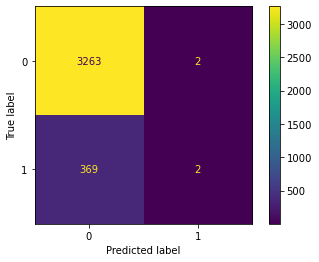

In [147]:
plot_confusion_matrix(model,X_test,y_test)

In [148]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3265
           1       0.50      0.01      0.01       371

    accuracy                           0.90      3636
   macro avg       0.70      0.50      0.48      3636
weighted avg       0.86      0.90      0.85      3636



# RandomForest 

In [176]:
rfmodel=RandomForestClassifier()

In [177]:
rfmodel.fit(X_train,y_train)

RandomForestClassifier()

In [178]:
y_pred=rfmodel.predict(X_test)

In [179]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3265
           1       0.91      0.06      0.11       371

    accuracy                           0.90      3636
   macro avg       0.91      0.53      0.53      3636
weighted avg       0.90      0.90      0.86      3636



C:\Users\sande\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


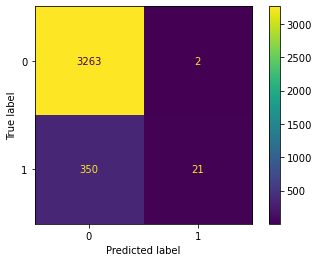

In [180]:
plot_confusion_matrix(rfmodel,X_test,y_test)

In [159]:
rfmodel.feature_importances_

array([0.0676998 , 0.01526313, 0.0451261 , 0.0612226 , 0.0351156 ,
       0.00229085, 0.06362874, 0.03942539, 0.01851192, 0.00918017,
       0.03709654, 0.05551192, 0.05689722, 0.01084451, 0.06543817,
       0.02002347, 0.04287514, 0.00498786, 0.03856034, 0.05275245,
       0.02503992, 0.01774403, 0.02260278, 0.00688147, 0.00632802,
       0.03312552, 0.01195682, 0.00960572, 0.03217785, 0.01685177,
       0.00989491, 0.01179302, 0.00336598, 0.00326468, 0.01714438,
       0.00711257, 0.00463962, 0.        , 0.00541504, 0.00490001,
       0.00770401, 0.        ])

In [160]:
feature_importances = pd.DataFrame({
    'features': x.columns,
    'importance': rfmodel.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

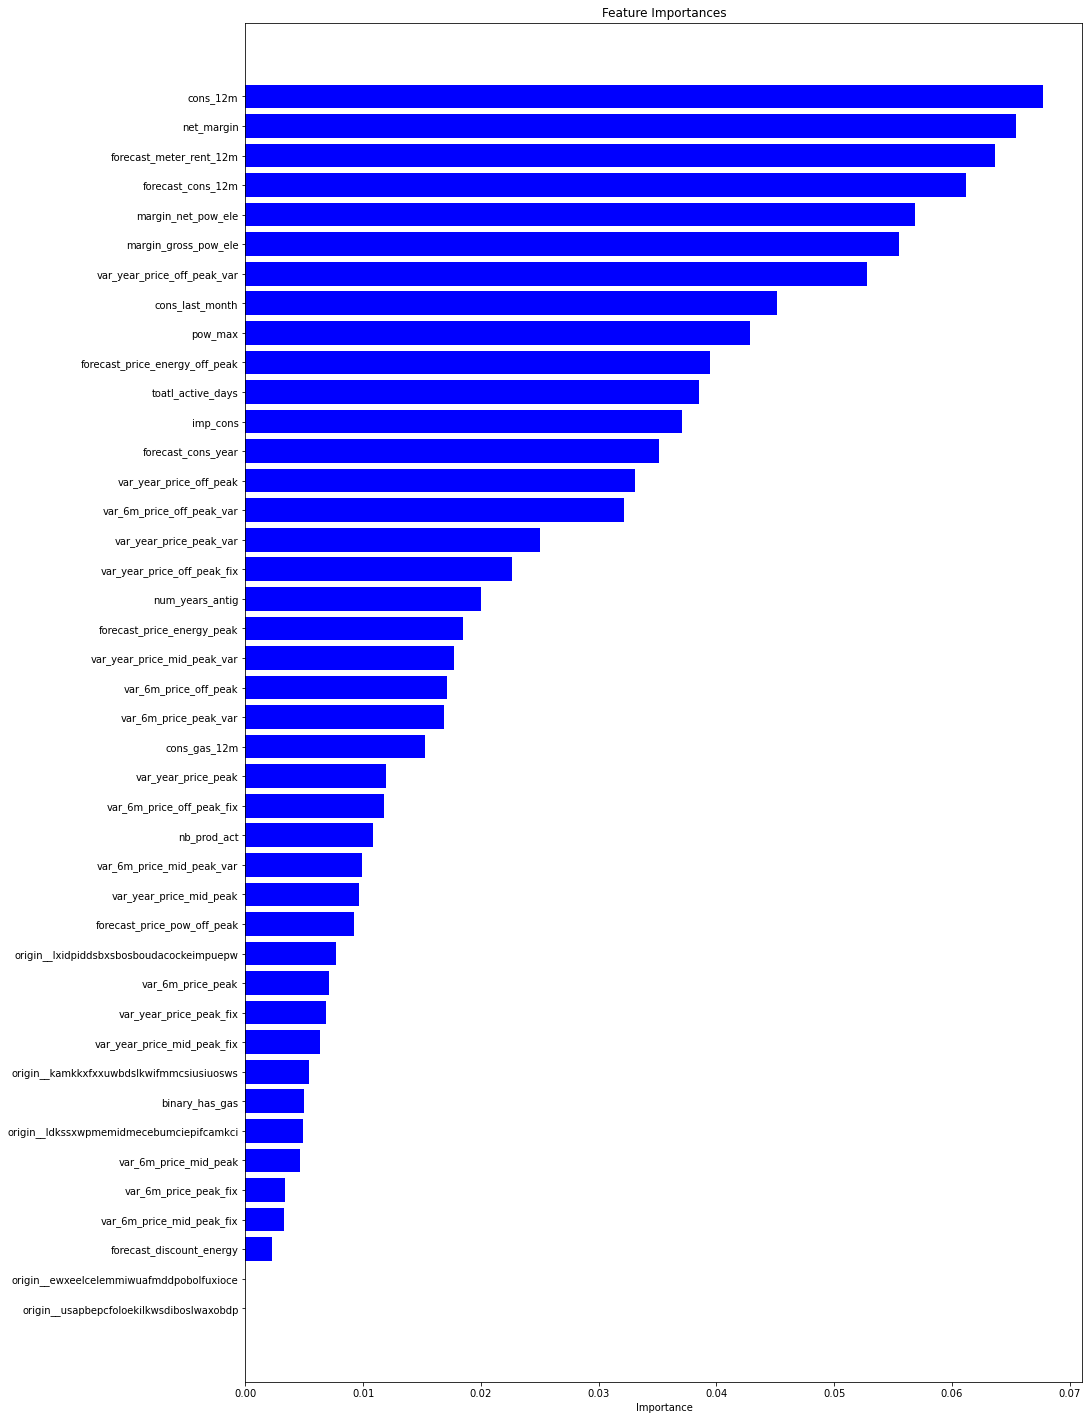

In [161]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [182]:
params={'n_estimators':[150,200,250,300],'min_samples_split':[2,5,7,9],'min_samples_leaf':[3,6,9,12],'class_weight' : ["balanced", "balanced_subsample"]}

In [183]:
rfgrid=GridSearchCV(rfmodel,params,verbose=2)

In [184]:
rfgrid.fit(X_train,y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END class_weight=balanced, min_samples_leaf=3, min_samples_split=2, n_estimators=150; total time=   3.8s
[CV] END class_weight=balanced, min_samples_leaf=3, min_samples_split=2, n_estimators=150; total time=   4.0s
[CV] END class_weight=balanced, min_samples_leaf=3, min_samples_split=2, n_estimators=150; total time=   4.0s
[CV] END class_weight=balanced, min_samples_leaf=3, min_samples_split=2, n_estimators=150; total time=   3.9s
[CV] END class_weight=balanced, min_samples_leaf=3, min_samples_split=2, n_estimators=150; total time=   3.9s
[CV] END class_weight=balanced, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   5.2s
[CV] END class_weight=balanced, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   5.4s
[CV] END class_weight=balanced, min_samples_leaf=3, min_samples_split=2, n_estimators=200; total time=   5.5s
[CV] END class_weight=balanced, min_samples_leaf=3, min_s

[CV] END class_weight=balanced, min_samples_leaf=3, min_samples_split=9, n_estimators=250; total time=   6.6s
[CV] END class_weight=balanced, min_samples_leaf=3, min_samples_split=9, n_estimators=300; total time=   7.8s
[CV] END class_weight=balanced, min_samples_leaf=3, min_samples_split=9, n_estimators=300; total time=   8.0s
[CV] END class_weight=balanced, min_samples_leaf=3, min_samples_split=9, n_estimators=300; total time=   8.1s
[CV] END class_weight=balanced, min_samples_leaf=3, min_samples_split=9, n_estimators=300; total time=   8.3s
[CV] END class_weight=balanced, min_samples_leaf=3, min_samples_split=9, n_estimators=300; total time=   8.1s
[CV] END class_weight=balanced, min_samples_leaf=6, min_samples_split=2, n_estimators=150; total time=   3.7s
[CV] END class_weight=balanced, min_samples_leaf=6, min_samples_split=2, n_estimators=150; total time=   3.8s
[CV] END class_weight=balanced, min_samples_leaf=6, min_samples_split=2, n_estimators=150; total time=   3.8s
[CV] END c

[CV] END class_weight=balanced, min_samples_leaf=6, min_samples_split=9, n_estimators=200; total time=   5.0s
[CV] END class_weight=balanced, min_samples_leaf=6, min_samples_split=9, n_estimators=250; total time=   6.2s
[CV] END class_weight=balanced, min_samples_leaf=6, min_samples_split=9, n_estimators=250; total time=   6.4s
[CV] END class_weight=balanced, min_samples_leaf=6, min_samples_split=9, n_estimators=250; total time=   6.4s
[CV] END class_weight=balanced, min_samples_leaf=6, min_samples_split=9, n_estimators=250; total time=   6.3s
[CV] END class_weight=balanced, min_samples_leaf=6, min_samples_split=9, n_estimators=250; total time=   6.3s
[CV] END class_weight=balanced, min_samples_leaf=6, min_samples_split=9, n_estimators=300; total time=   7.5s
[CV] END class_weight=balanced, min_samples_leaf=6, min_samples_split=9, n_estimators=300; total time=   7.7s
[CV] END class_weight=balanced, min_samples_leaf=6, min_samples_split=9, n_estimators=300; total time=   7.7s
[CV] END c

[CV] END class_weight=balanced, min_samples_leaf=9, min_samples_split=9, n_estimators=150; total time=   3.5s
[CV] END class_weight=balanced, min_samples_leaf=9, min_samples_split=9, n_estimators=200; total time=   4.8s
[CV] END class_weight=balanced, min_samples_leaf=9, min_samples_split=9, n_estimators=200; total time=   4.9s
[CV] END class_weight=balanced, min_samples_leaf=9, min_samples_split=9, n_estimators=200; total time=   4.9s
[CV] END class_weight=balanced, min_samples_leaf=9, min_samples_split=9, n_estimators=200; total time=   4.8s
[CV] END class_weight=balanced, min_samples_leaf=9, min_samples_split=9, n_estimators=200; total time=   4.8s
[CV] END class_weight=balanced, min_samples_leaf=9, min_samples_split=9, n_estimators=250; total time=   6.0s
[CV] END class_weight=balanced, min_samples_leaf=9, min_samples_split=9, n_estimators=250; total time=   6.3s
[CV] END class_weight=balanced, min_samples_leaf=9, min_samples_split=9, n_estimators=250; total time=   6.4s
[CV] END c

[CV] END class_weight=balanced, min_samples_leaf=12, min_samples_split=7, n_estimators=300; total time=   7.0s
[CV] END class_weight=balanced, min_samples_leaf=12, min_samples_split=7, n_estimators=300; total time=   7.2s
[CV] END class_weight=balanced, min_samples_leaf=12, min_samples_split=9, n_estimators=150; total time=   3.5s
[CV] END class_weight=balanced, min_samples_leaf=12, min_samples_split=9, n_estimators=150; total time=   3.6s
[CV] END class_weight=balanced, min_samples_leaf=12, min_samples_split=9, n_estimators=150; total time=   3.9s
[CV] END class_weight=balanced, min_samples_leaf=12, min_samples_split=9, n_estimators=150; total time=   4.0s
[CV] END class_weight=balanced, min_samples_leaf=12, min_samples_split=9, n_estimators=150; total time=   3.6s
[CV] END class_weight=balanced, min_samples_leaf=12, min_samples_split=9, n_estimators=200; total time=   4.9s
[CV] END class_weight=balanced, min_samples_leaf=12, min_samples_split=9, n_estimators=200; total time=   4.8s
[

[CV] END class_weight=balanced_subsample, min_samples_leaf=3, min_samples_split=7, n_estimators=200; total time=   5.7s
[CV] END class_weight=balanced_subsample, min_samples_leaf=3, min_samples_split=7, n_estimators=200; total time=   5.8s
[CV] END class_weight=balanced_subsample, min_samples_leaf=3, min_samples_split=7, n_estimators=250; total time=   7.2s
[CV] END class_weight=balanced_subsample, min_samples_leaf=3, min_samples_split=7, n_estimators=250; total time=   7.2s
[CV] END class_weight=balanced_subsample, min_samples_leaf=3, min_samples_split=7, n_estimators=250; total time=   7.4s
[CV] END class_weight=balanced_subsample, min_samples_leaf=3, min_samples_split=7, n_estimators=250; total time=   7.2s
[CV] END class_weight=balanced_subsample, min_samples_leaf=3, min_samples_split=7, n_estimators=250; total time=   7.3s
[CV] END class_weight=balanced_subsample, min_samples_leaf=3, min_samples_split=7, n_estimators=300; total time=   8.6s
[CV] END class_weight=balanced_subsample

[CV] END class_weight=balanced_subsample, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   8.4s
[CV] END class_weight=balanced_subsample, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   8.5s
[CV] END class_weight=balanced_subsample, min_samples_leaf=6, min_samples_split=5, n_estimators=300; total time=   8.6s
[CV] END class_weight=balanced_subsample, min_samples_leaf=6, min_samples_split=7, n_estimators=150; total time=   4.1s
[CV] END class_weight=balanced_subsample, min_samples_leaf=6, min_samples_split=7, n_estimators=150; total time=   4.2s
[CV] END class_weight=balanced_subsample, min_samples_leaf=6, min_samples_split=7, n_estimators=150; total time=   4.3s
[CV] END class_weight=balanced_subsample, min_samples_leaf=6, min_samples_split=7, n_estimators=150; total time=   4.2s
[CV] END class_weight=balanced_subsample, min_samples_leaf=6, min_samples_split=7, n_estimators=150; total time=   4.1s
[CV] END class_weight=balanced_subsample

[CV] END class_weight=balanced_subsample, min_samples_leaf=9, min_samples_split=5, n_estimators=200; total time=   5.3s
[CV] END class_weight=balanced_subsample, min_samples_leaf=9, min_samples_split=5, n_estimators=200; total time=   5.4s
[CV] END class_weight=balanced_subsample, min_samples_leaf=9, min_samples_split=5, n_estimators=200; total time=   5.3s
[CV] END class_weight=balanced_subsample, min_samples_leaf=9, min_samples_split=5, n_estimators=200; total time=   5.3s
[CV] END class_weight=balanced_subsample, min_samples_leaf=9, min_samples_split=5, n_estimators=250; total time=   6.6s
[CV] END class_weight=balanced_subsample, min_samples_leaf=9, min_samples_split=5, n_estimators=250; total time=   6.8s
[CV] END class_weight=balanced_subsample, min_samples_leaf=9, min_samples_split=5, n_estimators=250; total time=   6.8s
[CV] END class_weight=balanced_subsample, min_samples_leaf=9, min_samples_split=5, n_estimators=250; total time=   6.7s
[CV] END class_weight=balanced_subsample

[CV] END class_weight=balanced_subsample, min_samples_leaf=12, min_samples_split=2, n_estimators=300; total time=   7.7s
[CV] END class_weight=balanced_subsample, min_samples_leaf=12, min_samples_split=2, n_estimators=300; total time=   7.9s
[CV] END class_weight=balanced_subsample, min_samples_leaf=12, min_samples_split=2, n_estimators=300; total time=   8.0s
[CV] END class_weight=balanced_subsample, min_samples_leaf=12, min_samples_split=2, n_estimators=300; total time=   7.7s
[CV] END class_weight=balanced_subsample, min_samples_leaf=12, min_samples_split=2, n_estimators=300; total time=   7.8s
[CV] END class_weight=balanced_subsample, min_samples_leaf=12, min_samples_split=5, n_estimators=150; total time=   3.8s
[CV] END class_weight=balanced_subsample, min_samples_leaf=12, min_samples_split=5, n_estimators=150; total time=   3.9s
[CV] END class_weight=balanced_subsample, min_samples_leaf=12, min_samples_split=5, n_estimators=150; total time=   3.9s
[CV] END class_weight=balanced_s

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'min_samples_leaf': [3, 6, 9, 12],
                         'min_samples_split': [2, 5, 7, 9],
                         'n_estimators': [150, 200, 250, 300]},
             verbose=2)

In [185]:
rfgrid.best_params_

{'class_weight': 'balanced_subsample',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 250}

In [186]:
y_pred=rfgrid.predict(X_test)

In [187]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3265
           1       0.76      0.07      0.12       371

    accuracy                           0.90      3636
   macro avg       0.83      0.53      0.54      3636
weighted avg       0.89      0.90      0.86      3636



C:\Users\sande\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


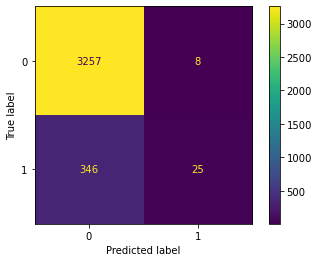

In [188]:
plot_confusion_matrix(rfgrid,X_test,y_test)